# Data loading...

In [1]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as ws

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, TargetEncoder, StandardScaler, MinMaxScaler

In [2]:
# loading data set into a pandas dataframe object 'df'

try:
    df = pd.read_csv('delhivery_data.csv')
    print("Delhivery data set loaded successfully!")

except Exception as e:
    print(f"Failed to load Delhivery data set. Try again!\nError :: {e}")


Delhivery data set loaded successfully!


In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Data exploration and cleanup❗

## Handeling NULL values

In [5]:
# Check possible NULL values in each column

missing_value = pd.DataFrame(
    {
        'Missing Value': df.isnull().sum(),
        'Percentage': (df.isnull().sum() / len(df))*100
    }
)

missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
cutoff_factor,0,0.000000
segment_osrm_distance,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
factor,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000


Columns source_name and destination_name have null values with percentage of less than 1 (< 1%)<br>
We can...
- either proceed with removing those rows that have the null values in the 2 columns
- or fill those values.

First, let's see what are all the source and destination centers (IDs) for the corresponding missing data

In [6]:
source_id_of_nulls = df[df['source_name'].isna()]['source_center'].unique()
source_id_of_nulls

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [7]:
destination_id_of_nulls = df[df['destination_name'].isna()]['destination_center'].unique()
destination_id_of_nulls

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

Above center IDs are the IDs corresponds to the missing source and destination names.
If each of these IDs have mentioned at least once about their corresponding source and destination names, we can use that value to map the other missing values of that ID.

Let's see if any of the IDs (source & destination) have any data of their names (source & destination)

In [8]:
for source_id in source_id_of_nulls:
    print(f"Unique source names for {source_id} :: {df[df['source_center'] == source_id]['source_name'].unique()}")

Unique source names for IND342902A1B :: [nan]
Unique source names for IND577116AAA :: [nan]
Unique source names for IND282002AAD :: [nan]
Unique source names for IND465333A1B :: [nan]
Unique source names for IND841301AAC :: [nan]
Unique source names for IND509103AAC :: [nan]
Unique source names for IND126116AAA :: [nan]
Unique source names for IND331022A1B :: [nan]
Unique source names for IND505326AAB :: [nan]
Unique source names for IND852118A1B :: [nan]


In [9]:
for dest_id in destination_id_of_nulls:
    print(f"Unique destination names for {dest_id} ::",
          f"{df[df['destination_center'] == dest_id]['destination_name'].unique()}")

Unique destination names for IND342902A1B :: [nan]
Unique destination names for IND577116AAA :: [nan]
Unique destination names for IND282002AAD :: [nan]
Unique destination names for IND465333A1B :: [nan]
Unique destination names for IND841301AAC :: [nan]
Unique destination names for IND505326AAB :: [nan]
Unique destination names for IND852118A1B :: [nan]
Unique destination names for IND126116AAA :: [nan]
Unique destination names for IND509103AAC :: [nan]
Unique destination names for IND221005A1A :: [nan]
Unique destination names for IND250002AAC :: [nan]
Unique destination names for IND331001A1C :: [nan]
Unique destination names for IND122015AAC :: [nan]


**Inference**:
- None of the IDs have any data regarding their names.
- Thus, data imputation will actually corrupt the given data, as we might end up mapping different centers (IDs) with different names.<br>
This could create confusion for any analysis related to pick up and drop locations
- Since the missing values are less that 1% (<1%), dropping rows with NULL values will be the best approach

In [10]:
# Drop rows where either of the columns have NULL values

df.dropna(subset=['source_name', 'destination_name'], how='any', inplace=True)

In [11]:
# Check the presence of NULL values

df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [12]:
df.shape

(144316, 24)

## Convering time columns into pandas datetime

In [13]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [14]:
# Timestamp columns

timestamp_cols = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']

In [15]:
# see the format of timestamp values in the columns

df[timestamp_cols]

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55
...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19


In [16]:
df['trip_creation_time_1'] = pd.to_datetime(df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['trip_creation_time_2'] = pd.to_datetime(df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Merging them both
df['trip_creation_time'] = df['trip_creation_time_1'].combine_first(df['trip_creation_time_2'])

In [17]:
df['od_start_time_1'] = pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['od_start_time_2'] = pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Merging them both
df['od_start_time'] = df['od_start_time_1'].combine_first(df['od_start_time_2'])

In [18]:
df['od_end_time_1'] = pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['od_end_time_2'] = pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Merging them both
df['od_end_time'] = df['od_end_time_1'].combine_first(df['od_end_time_2'])

In [19]:
df['cutoff_timestamp_1'] = pd.to_datetime(df['cutoff_timestamp'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['cutoff_timestamp_2'] = pd.to_datetime(df['cutoff_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Merging them both
df['cutoff_timestamp'] = df['cutoff_timestamp_1'].combine_first(df['cutoff_timestamp_2'])

In [20]:
# Check to see if any of the timestamp columns have NULL, i.e., did the conversion fail

df[timestamp_cols].isna().sum()

trip_creation_time    0
od_start_time         0
od_end_time           0
cutoff_timestamp      0
dtype: int64

In [21]:
df[timestamp_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trip_creation_time  144316 non-null  datetime64[ns]
 1   od_start_time       144316 non-null  datetime64[ns]
 2   od_end_time         144316 non-null  datetime64[ns]
 3   cutoff_timestamp    144316 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 5.5 MB


**Timestamp conversion successfull**

Let's drop the unnecessary timestamp columns that we created

In [22]:
cols = ['trip_creation_time_1','trip_creation_time_2','od_start_time_1','od_start_time_2',
        'od_end_time_1','od_end_time_2','cutoff_timestamp_1','cutoff_timestamp_2']

In [23]:
df.drop(columns=cols, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

## Structure and characteristic analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [26]:
# Let's also separate numerical and categorical columns

num_cols = list(df.select_dtypes(include=np.number).columns)
num_cols

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

Technially all the 'object' type columns could be categorical in nature.<br>
But string data is also represented as 'object'<br>

On through observation, there are only 2 columns with categorical nature:
- data
- route_type

Although, `data` simply represent the type of data we are dealing — this is relevant while development of a ML model, which are not doing here.<br>
**So the only relevant categorical column we have is `route_type`**

In [27]:
cat_cols = ['route_type']
cat_cols

['route_type']

In [28]:
# Let's see some stats for the data.

In [29]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144316.0,963.697698,1038.082976,20.000000,161.000000,451.000000,1645.000000,7898.000000
cutoff_factor,144316.0,233.561345,345.245823,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144316.0,234.708498,345.480571,9.000045,23.352027,66.135322,286.919294,1927.447705
actual_time,144316.0,417.996237,598.940065,9.000000,51.000000,132.000000,516.000000,4532.000000
osrm_time,144316.0,214.437055,308.448543,6.000000,27.000000,64.000000,259.000000,1686.000000
osrm_distance,144316.0,285.549785,421.717826,9.008200,29.896250,78.624400,346.305400,2326.199100
factor,144316.0,2.120178,1.717065,0.144000,1.604545,1.857143,2.212280,77.387097
segment_actual_time,144316.0,36.175379,53.524298,-244.000000,20.000000,28.000000,40.000000,3051.000000
segment_osrm_time,144316.0,18.495697,14.774008,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144316.0,22.818993,17.866367,0.000000,12.053975,23.508300,27.813325,2191.403700


In [30]:
df['route_type'].value_counts()

route_type
FTL        99132
Carting    45184
Name: count, dtype: int64

In [31]:
# Skewness of numerical columns

df[num_cols].skew()

start_scan_to_end_scan             1.105346
cutoff_factor                      1.986206
actual_distance_to_destination     1.985217
actual_time                        2.062382
osrm_time                          2.039250
osrm_distance                      2.042302
factor                            17.498068
segment_actual_time               16.820429
segment_osrm_time                 19.705727
segment_osrm_distance             26.643163
segment_factor                    47.336172
dtype: float64

Let's plot the numerical columns to observation their distribution pattern.

In [32]:
# A function to create a boxplot and histplot side-by-side for a singal variable

def univariate_plot(x, y, figsize=(15, 5)):
    """
    Creates side-by-side boxplot and histogram for a univariate analysis.
    Parameters:
    x (array-like): Data for the analysis.
    y (str): Title for the plots.
    figsize (tuple): Size of the figure.
    """
    mean, median, mode = x.mean(), x.median(), x.mode()[0]

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Boxplot
    sns.boxplot(x=x, ax=axes[0])
    axes[0].set_title(f"Boxplot of {y}")

    # Histogram
    sns.histplot(x=x, bins=50, ax=axes[1])
    axes[1].axvline(mean, color='orange', linestyle='-', linewidth=1.5, label='Mean')
    axes[1].axvline(median, color='red', linestyle='-.', linewidth=1.5, label='Median')
    axes[1].axvline(mode, color='green', linestyle='--', linewidth=1.5, label='Mode')
    axes[1].legend()
    axes[1].set_title(f"Histogram with KDE of {y}")

    stats_text = f"Mean: {mean:.2f} | Median: {median:.2f} | Mode: {mode:.2f}"
    axes[1].text(0.5, -0.2, stats_text, ha='center', va='center', transform=axes[1].transAxes, fontsize=12)

    plt.tight_layout()
    plt.show()

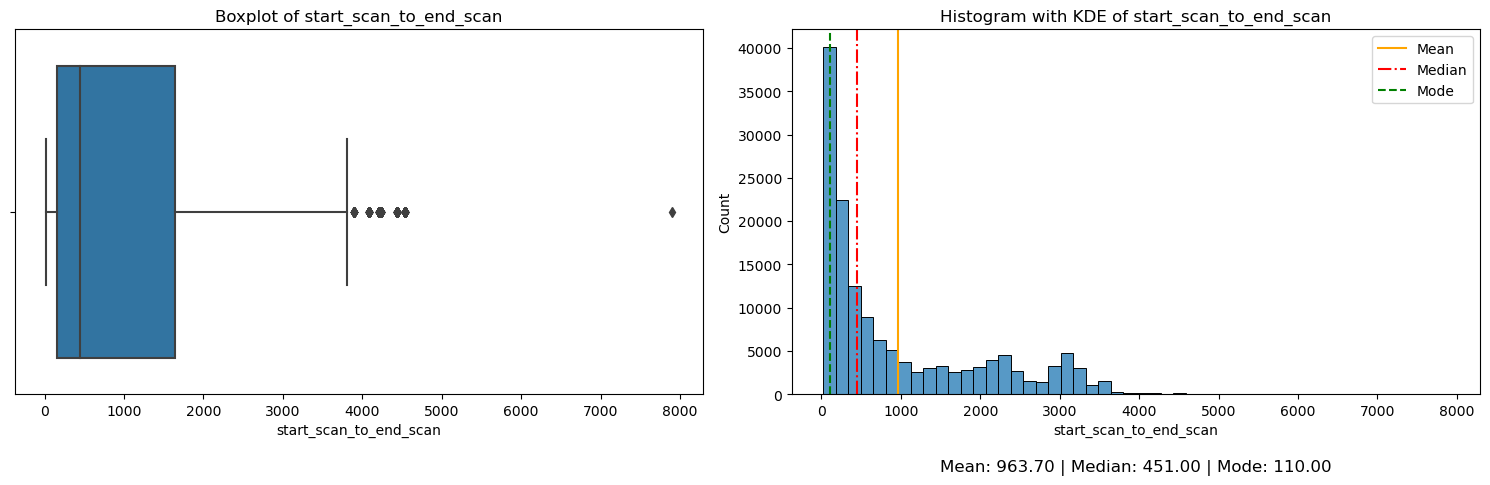

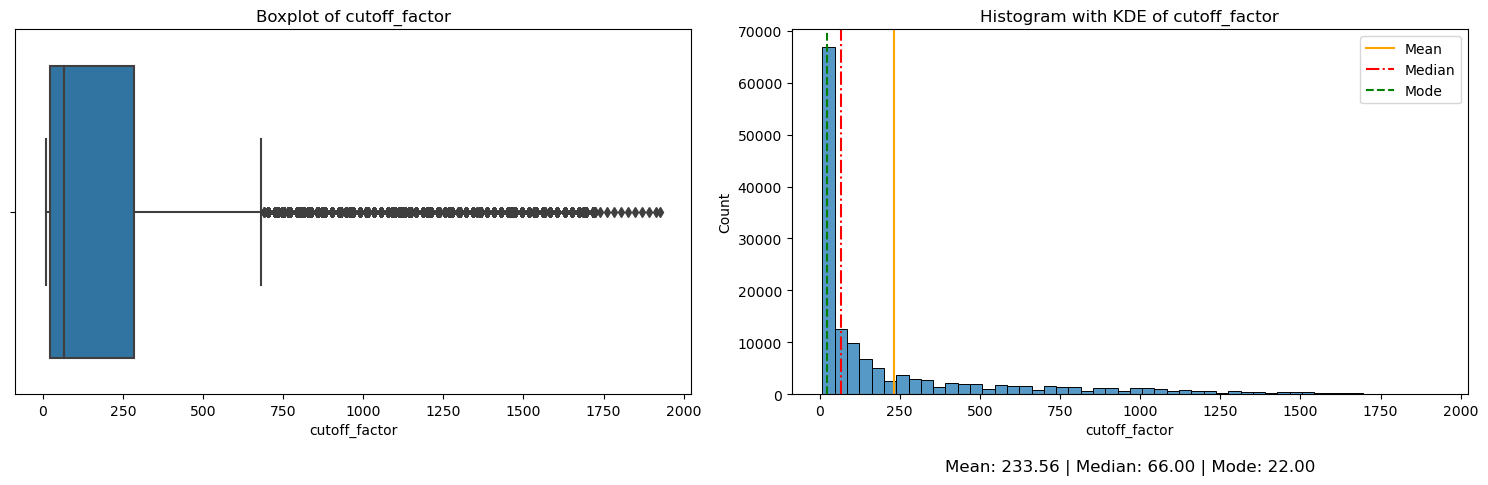

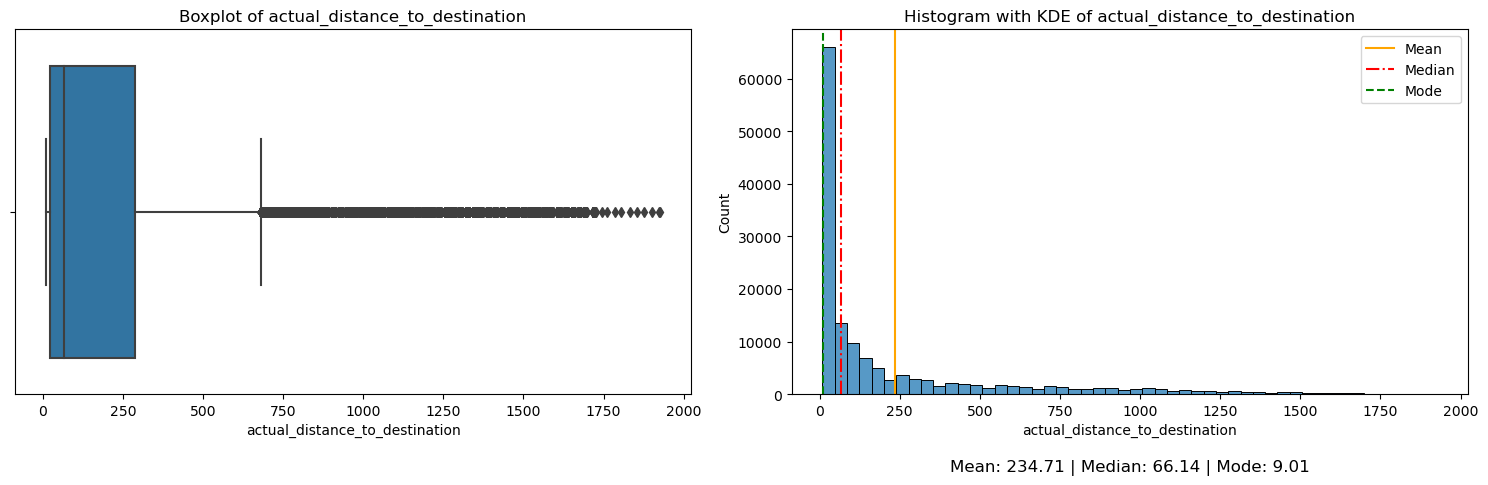

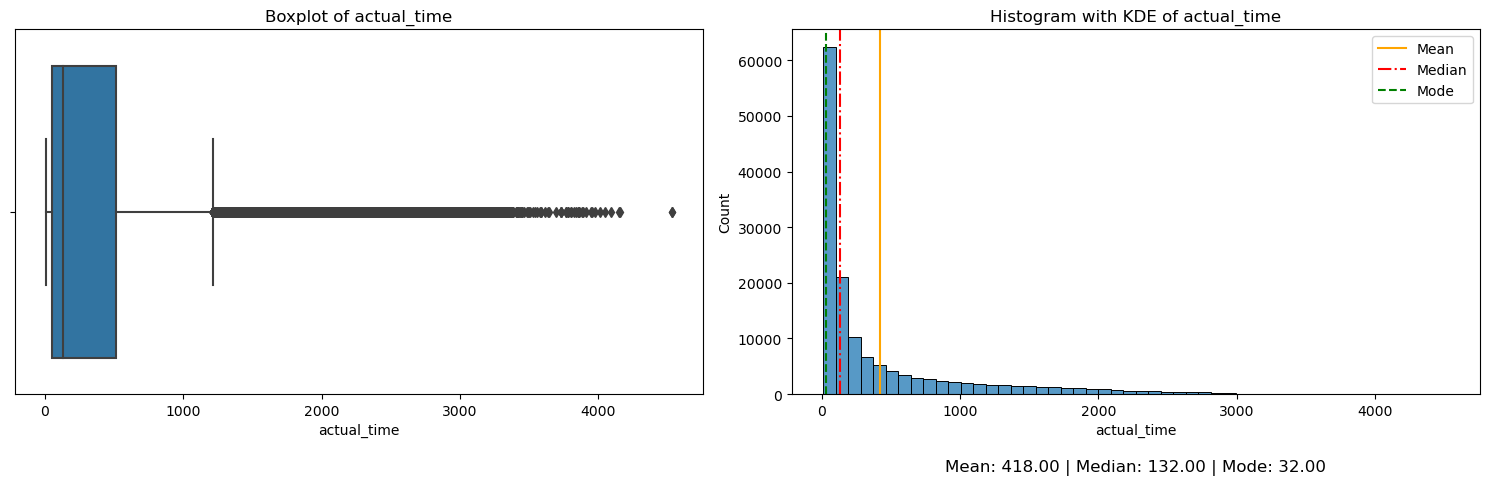

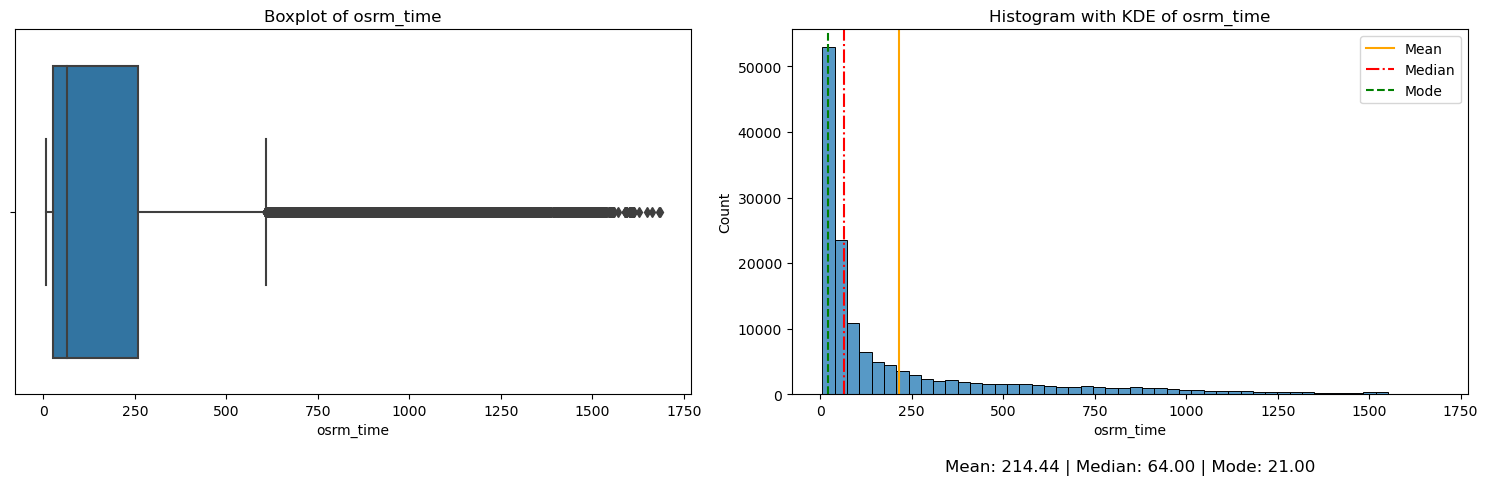

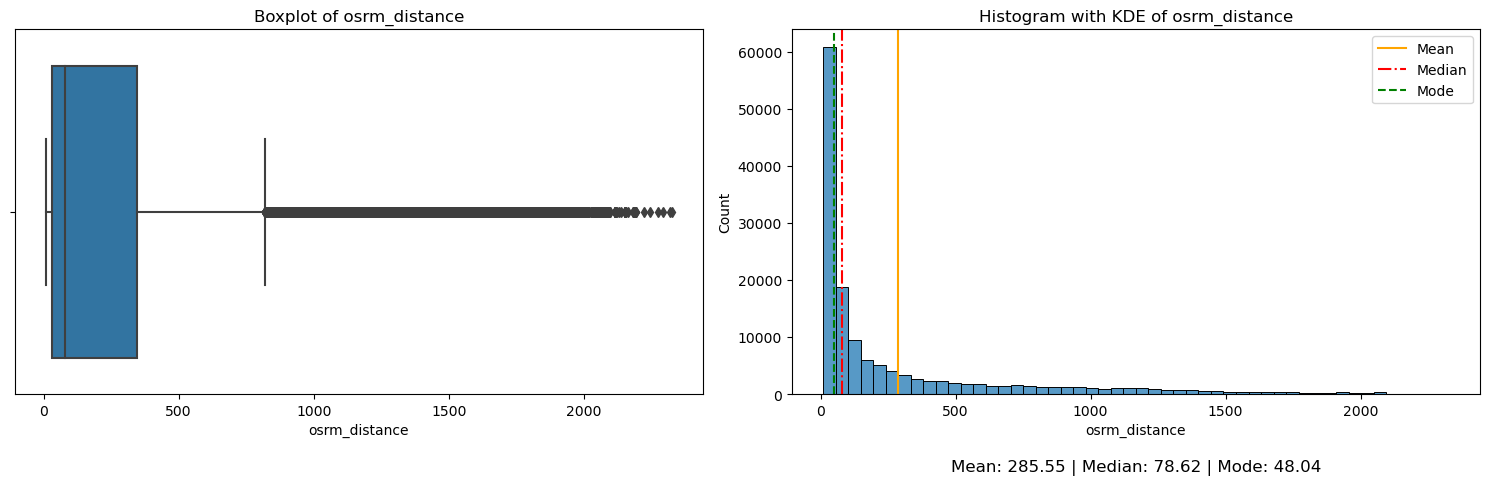

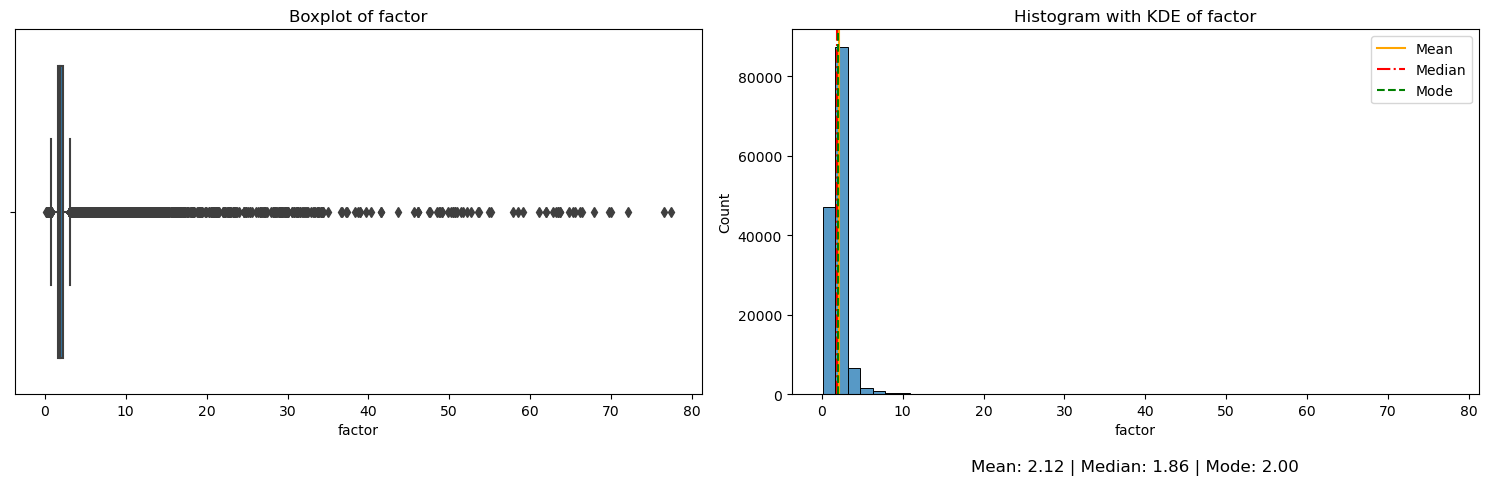

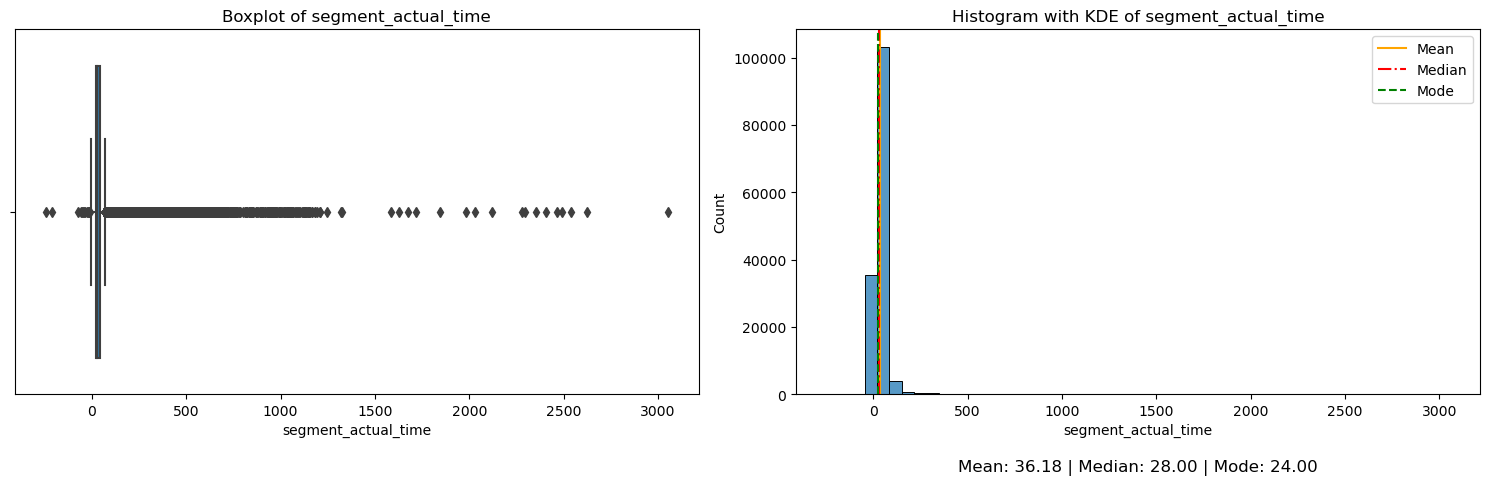

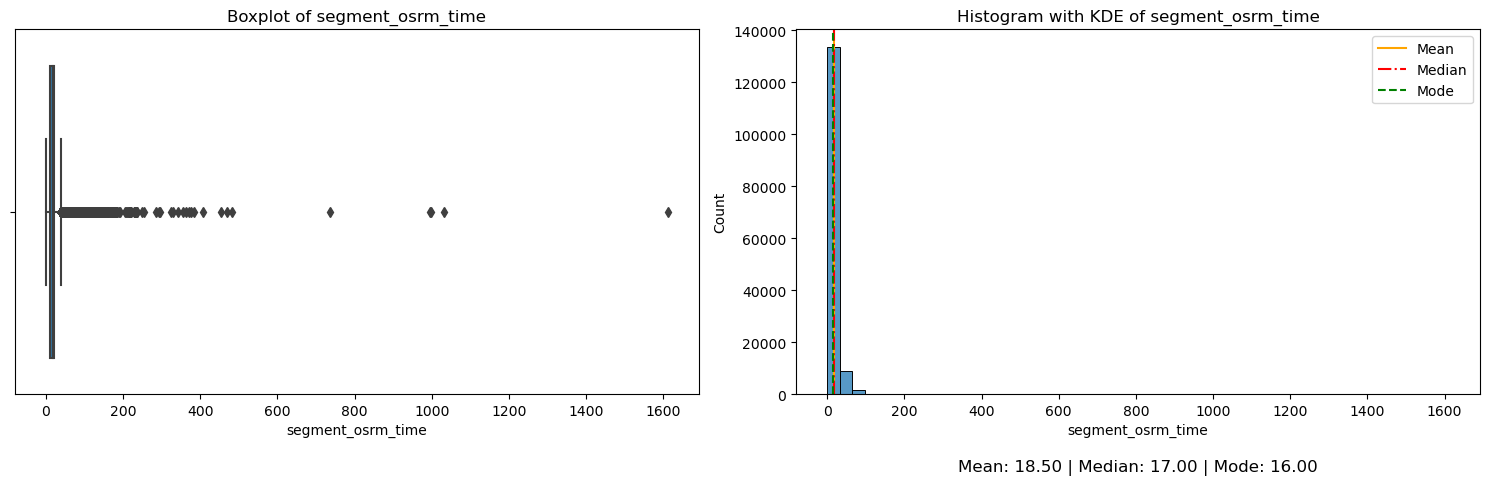

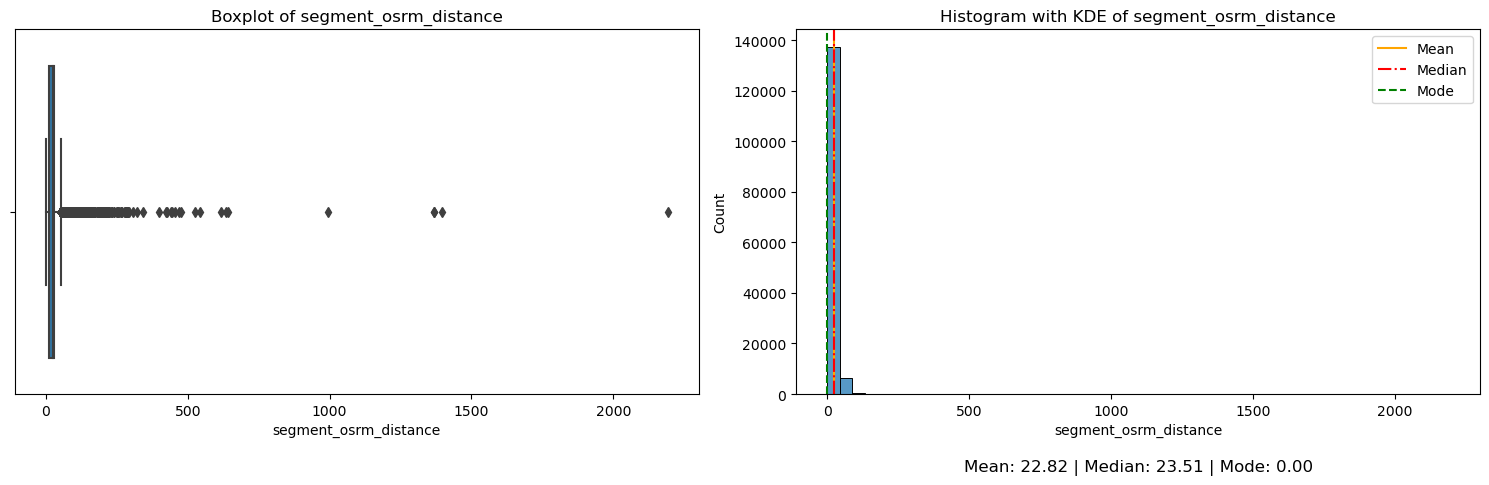

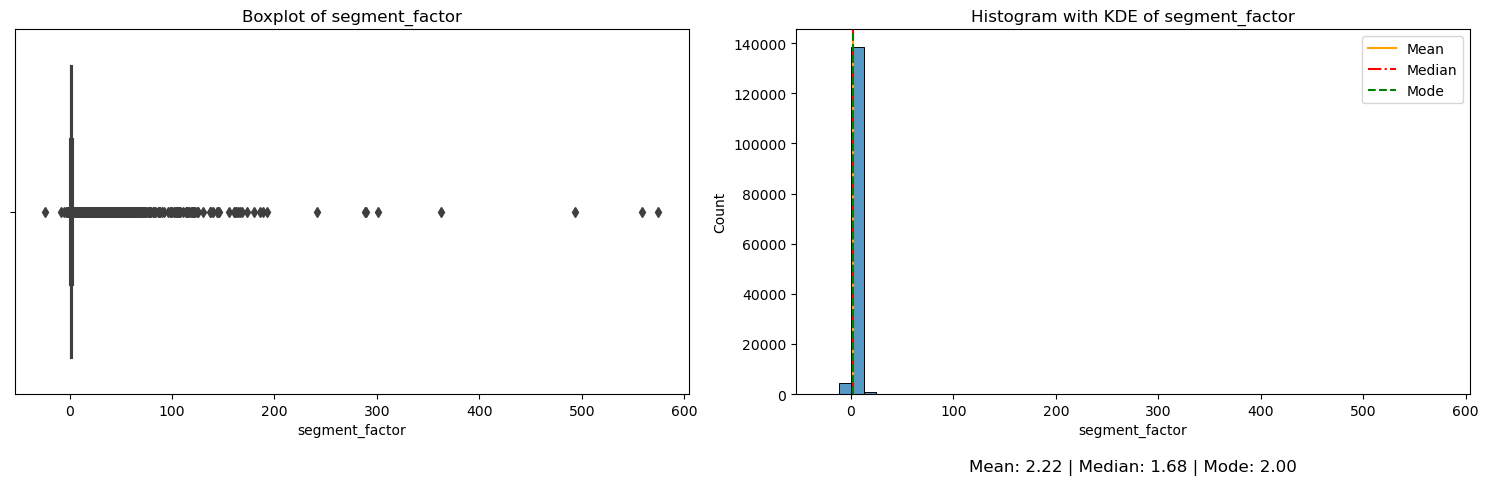

In [33]:
for col in num_cols:
    univariate_plot(df[col], col)

**Observations:**
- All the numerical columns are right skewed in nature.
- Even though they are skewed, some of the numerical columns mean and median values are very close to each other such as:
  - factor
  - segment_osrm_time
  - segment_osrm_distance
- This means that there are some potentional extreme outliers in these columns which are giving them skewness nature but are not affecting the distribution significantly.
- `route_type` column has only 2 categories, FTL being more in number that Carting.<br>
This is expected behaviour as FTL will lead to less in b/w stopping of the trip and quicker delivery — as a logistic company, this could be one of the KPI or L1 matrix for Delhivery


# Merging rows

Let's create a new ID by combining columns `trip_uuid`, `source_center` and `destination_center`.<br>
But then we need to merge other columns somehow to map to this new ID.<br>
Since, we have different data types of column, **the merging logic will be different for each column.**

In [34]:
# We will start with creating a new ID from the 3 columns mentioned above

df['segment_id'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

In [35]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id'],
      dtype='object')

In [36]:
# Unique no. of segment IDs we have

df['segment_id'].nunique()

26222

In [37]:
# Aggregation logic

aggregation_logic = {
    'segment_actual_time': 'cumsum',
    'segment_osrm_time': 'cumsum',
    'segment_osrm_distance': 'cumsum'
}

In [38]:
cumsum_cols = ['segment_actual_time_cumsum', 'segment_osrm_time_cumsum', 'segment_osrm_distance_cumsum']
cumsum_cols

['segment_actual_time_cumsum',
 'segment_osrm_time_cumsum',
 'segment_osrm_distance_cumsum']

In [39]:
# Grouping the data set on 'segment_id' and apply aggregation logic defind above

df[cumsum_cols] = df.groupby('segment_id').agg(aggregation_logic)

In [40]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_id,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,44.0,49.4772


In [41]:
df_sorted = df.sort_values(by=['segment_id','od_end_time'], ascending=[True, True])

In [42]:
df_sorted.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_id,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,38.0620,1.515152,50.0,33.0,38.0620,1.515152,trip-153671041653548748_IND209304AAA_IND000000ACB,50.0,33.0,38.0620
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,49.0540,1.463415,9.0,8.0,10.9921,1.125000,trip-153671041653548748_IND209304AAA_IND000000ACB,59.0,41.0,49.0541
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,79.6849,1.468750,34.0,22.0,30.6308,1.545455,trip-153671041653548748_IND209304AAA_IND000000ACB,93.0,63.0,79.6849
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,104.7807,1.481481,25.0,17.0,25.0959,1.470588,trip-153671041653548748_IND209304AAA_IND000000ACB,118.0,80.0,104.7808
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,125.8196,1.458333,20.0,14.0,21.0389,1.428571,trip-153671041653548748_IND209304AAA_IND000000ACB,138.0,94.0,125.8197


# Feature Engineering 

## Wait time

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

**Observations:**<br>
Following 2 columns: 
- `trip_creation_time` — Timestamp when trip was created.
- `od_start_time` — Trip start time
The difference b/w these 2 variables can tell us if there was any waiting time before the trip started, if yes, how long.

In [44]:
# 'waiting_time' — after the trip has been created it is the waiting time before the trip started

df['waiting_time'] = df['od_start_time'] - df['trip_creation_time']

In [45]:
df['waiting_time'].describe().reset_index()

,index,waiting_time
0,count,144316
1,mean,0 days 04:27:32.981652609
2,std,0 days 08:01:01.109591795
3,min,0 days 00:00:00
4,25%,0 days 00:00:00
5,50%,0 days 00:00:00
6,75%,0 days 06:12:52.265093750
7,max,2 days 11:35:00.880161


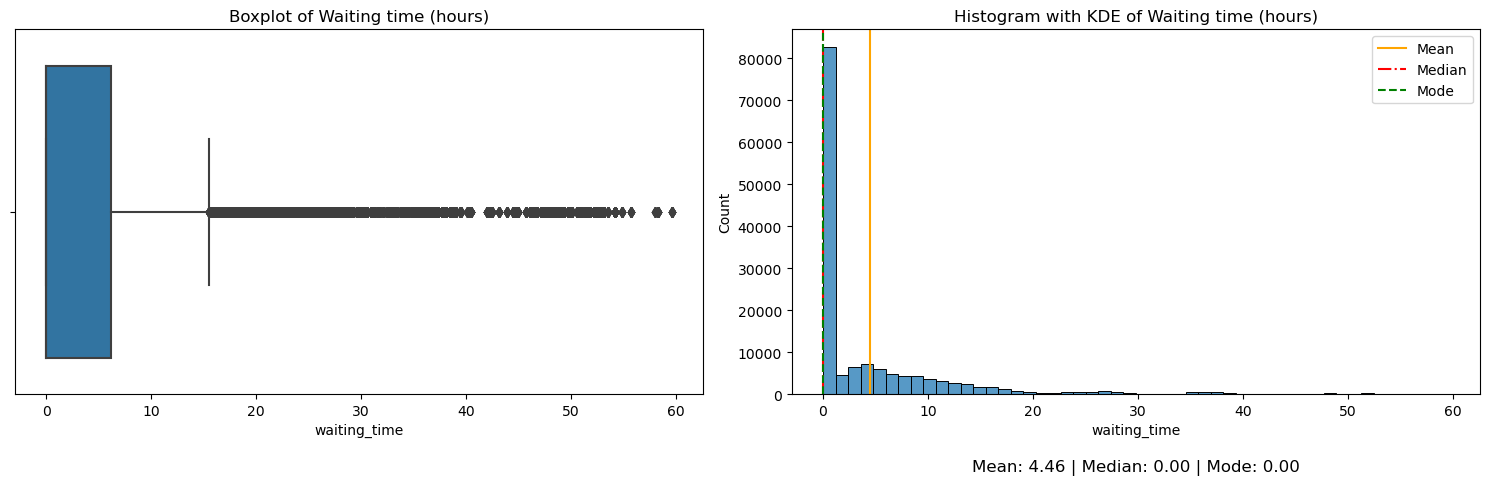

In [46]:
univariate_plot(df['waiting_time'].dt.total_seconds() / 3600, "Waiting time (hours)")

**Observations:**
- The distribution is heavely right skewed<br> 
Thus median will be a better representation of central tendency<br>
Mostly, the waiting time very less (almost immediately — median value)
- Sometimes (could be due to some factors) waiting times are extremely long, even upto 2 days (max value)<br>
These could be potential outliers
- 75% of data falls under 6 hours mark<br>
Thus we can conclude that a trip usually starts within few hours of it's start time.<br>
This is import for Delhivery being a logistic company.


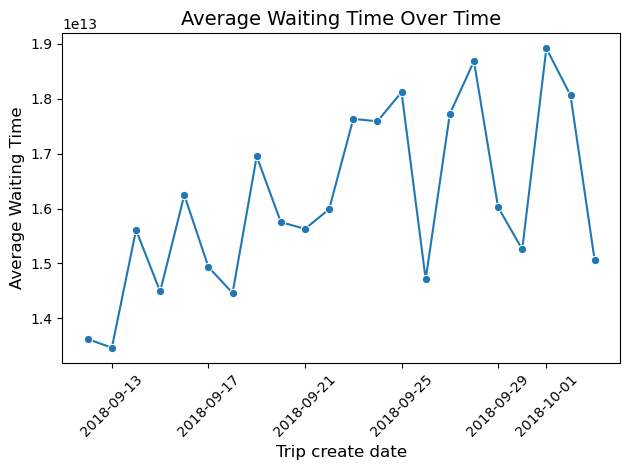

In [47]:
df['trip_creation_time_date'] = df['trip_creation_time'].dt.date
daily_waiting_time = df.groupby('trip_creation_time_date')['waiting_time'].mean()

sns.lineplot(data=daily_waiting_time, marker="o")

plt.title('Average Waiting Time Over Time', fontsize=14)
plt.xlabel('Trip create date', fontsize=12)
plt.ylabel('Average Waiting Time', fontsize=12)
plt.xticks(rotation=45)

# Flip the y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

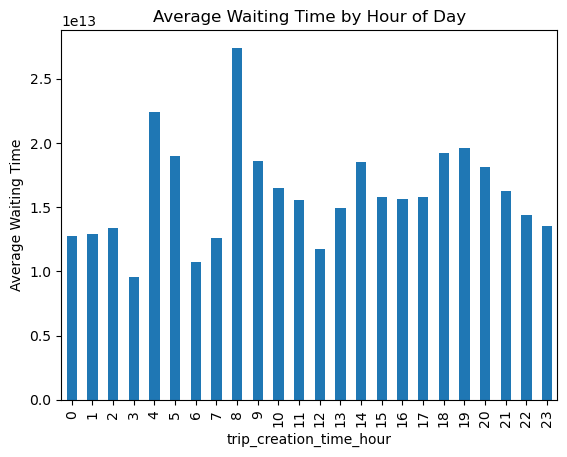

In [48]:
df['trip_creation_time_hour'] = df['trip_creation_time'].dt.hour
hourly_waiting_time = df.groupby('trip_creation_time_hour')['waiting_time'].mean()

hourly_waiting_time.plot(kind='bar', title='Average Waiting Time by Hour of Day', ylabel='Average Waiting Time')
plt.show()

In [49]:
# Get the state values of source and destinations

df['source_name_state'] = df['source_name'].str.extract(r'\((.*?)\)')
df['destination_name_state'] = df['destination_name'].str.extract(r'\((.*?)\)')

In [50]:
df['source_name_state'].nunique(), df['destination_name_state'].nunique()

(31, 32)

In [51]:
df[~df['destination_name_state'].isin(df['source_name_state'])]['destination_name_state'].unique()

array(['Daman & Diu'], dtype=object)

In [52]:
df[df['destination_name_state'] == 'Daman & Diu']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_factor,segment_id,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,waiting_time,trip_creation_time_date,trip_creation_time_hour,source_name_state,destination_name_state
39300,test,2018-10-03 02:00:12.947896,thanos::sroute:fbc671d5-317e-4df9-9679-04c9416...,Carting,trip-153853201294752521,IND396191AAC,Vapi_IndEstat_I (Gujarat),IND396210AAA,Daman_DC (Daman & Diu),2018-10-03 02:00:12.947896,...,3.909091,trip-153853201294752521_IND396191AAC_IND396210AAA,43.0,11.0,10.2921,0 days,2018-10-03,2,Gujarat,Daman & Diu


In [53]:
route_type_waiting_time = df.groupby('route_type')['waiting_time'].mean()
route_type_waiting_time

route_type
Carting   0 days 01:37:08.635917248
FTL       0 days 05:45:13.200731277
Name: waiting_time, dtype: timedelta64[ns]

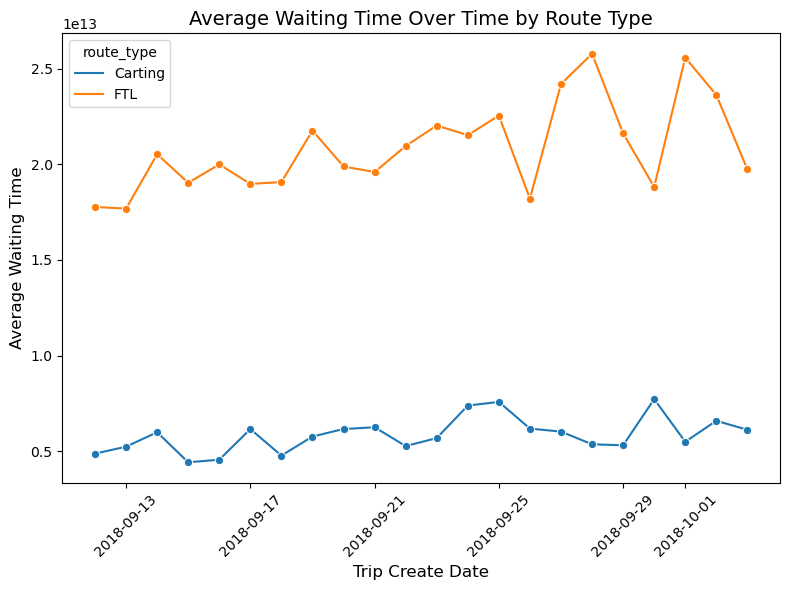

In [292]:
# Group by 'trip_creation_time_date' and 'route_type' to calculate the mean waiting time
daily_waiting_time_per_route = df.groupby(['trip_creation_time_date', 'route_type'])['waiting_time'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=daily_waiting_time_per_route, 
             x='trip_creation_time_date', 
             y='waiting_time', 
             hue='route_type', 
             marker="o")

plt.title('Average Waiting Time Over Time by Route Type', fontsize=14)
plt.xlabel('Trip Create Date', fontsize=12)
plt.ylabel('Average Waiting Time', fontsize=12)
plt.xticks(rotation=45)

# Flip the y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

**Observations & Inferences:**
- Average waiting, although very inconsistent, has increaased over time.<br>
This is not a good sign and will affect the company in a negative way.
    - For Carting type loading: waiting time has stayed consistent — overall waiting time is under 2 hours<br>
    This could be because in carting there are multiple stops (multiple deliveries) so package handeling can be done parallely and reducing the wait time.
    - For FTL type loading: waiting time has increased with time — overall waiting time is apporximately 6 hours<br>
    Since, the entire truck needs to be loaded for 1 stop, handeling may cause time delay.
- 'Daman & Diu' is the only place from where **Delhivery** doesn't have any pick up from but there is 1 delivery to the location.

## Time taken for the delivery

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   data                            144316 non-null  object         
 1   trip_creation_time              144316 non-null  datetime64[ns] 
 2   route_schedule_uuid             144316 non-null  object         
 3   route_type                      144316 non-null  object         
 4   trip_uuid                       144316 non-null  object         
 5   source_center                   144316 non-null  object         
 6   source_name                     144316 non-null  object         
 7   destination_center              144316 non-null  object         
 8   destination_name                144316 non-null  object         
 9   od_start_time                   144316 non-null  datetime64[ns] 
 10  od_end_time                     144316 non-null  

In [56]:
df['od_delivery_time'] = df['od_end_time'] - df['od_start_time']

In [57]:
# All the columns which are related to delivery time.

del_time_cols = ['od_delivery_time','start_scan_to_end_scan', 'actual_time', 'osrm_time']
del_time_cols

['od_delivery_time', 'start_scan_to_end_scan', 'actual_time', 'osrm_time']

In [58]:
df[del_time_cols]

,od_delivery_time,start_scan_to_end_scan,actual_time,osrm_time
0,0 days 01:26:12.818197,86.0,14.0,11.0
1,0 days 01:26:12.818197,86.0,24.0,20.0
2,0 days 01:26:12.818197,86.0,40.0,28.0
3,0 days 01:26:12.818197,86.0,62.0,40.0
4,0 days 01:26:12.818197,86.0,68.0,44.0
...,...,...,...,...
144862,0 days 07:07:41.181838,427.0,94.0,60.0
144863,0 days 07:07:41.181838,427.0,120.0,76.0
144864,0 days 07:07:41.181838,427.0,140.0,88.0
144865,0 days 07:07:41.181838,427.0,158.0,98.0


On thorough observations it appears that the all the delivery time columns have been calculated in minutes. <br>So we need to convert the `od_delivery_time` column in the minutes, as well

In [59]:
df['od_delivery_time'] = df['od_delivery_time'].dt.total_seconds()//60

In [60]:
df[del_time_cols].sample(10)

,od_delivery_time,start_scan_to_end_scan,actual_time,osrm_time
38026,76.0,76.0,16.0,8.0
134426,398.0,398.0,234.0,79.0
5496,95.0,95.0,27.0,14.0
14903,2261.0,2261.0,1257.0,629.0
99030,106.0,106.0,46.0,18.0
122515,724.0,724.0,237.0,114.0
90822,2076.0,2076.0,1341.0,739.0
62887,2177.0,2177.0,1373.0,642.0
59585,1033.0,1033.0,913.0,395.0
50029,634.0,634.0,322.0,194.0


In [61]:
df[df['od_delivery_time'] != df['start_scan_to_end_scan']].shape

(0, 34)

So `start_scan_to_end_scan` is actually the time difference (in minutes) b/w trip start time and trip end time<br>
We don't need `od_delivery_time` column anymore.

In [62]:
df.drop(columns=['od_delivery_time'], inplace=True)

In [63]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'waiting_time',
       'trip_creation_time_date', 'trip_creation_time_hour',
       'source_name_state', 'destination_name_state'],
      dtype='object')

In [64]:
del_time_cols.remove('od_delivery_time')
del_time_cols

['start_scan_to_end_scan', 'actual_time', 'osrm_time']

In [65]:
df[['start_scan_to_end_scan', 'actual_time']].corr()

,start_scan_to_end_scan,actual_time
start_scan_to_end_scan,1.000000,0.785788
actual_time,0.785788,1.000000


<Axes: xlabel='start_scan_to_end_scan', ylabel='actual_time'>

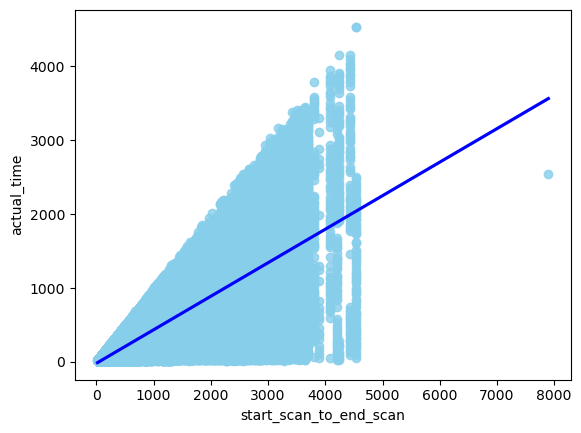

In [66]:
sns.regplot(data = df, x = 'start_scan_to_end_scan', y = 'actual_time', 
            scatter_kws = {'color':'skyblue'}, line_kws = {'color':'blue'})

In [67]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'waiting_time',
       'trip_creation_time_date', 'trip_creation_time_hour',
       'source_name_state', 'destination_name_state'],
      dtype='object')

In [68]:
df.sort_values(by=['segment_id', 'od_end_time'])[['segment_id', 'actual_time', 'segment_actual_time_cumsum', 'osrm_time', 'segment_osrm_time_cumsum']].head(10)

,segment_id,actual_time,segment_actual_time_cumsum,osrm_time,segment_osrm_time_cumsum
125002,trip-153671041653548748_IND209304AAA_IND000000ACB,50.0,50.0,33.0,33.0
125003,trip-153671041653548748_IND209304AAA_IND000000ACB,60.0,59.0,41.0,41.0
125004,trip-153671041653548748_IND209304AAA_IND000000ACB,94.0,93.0,64.0,63.0
125005,trip-153671041653548748_IND209304AAA_IND000000ACB,120.0,118.0,81.0,80.0
125006,trip-153671041653548748_IND209304AAA_IND000000ACB,140.0,138.0,96.0,94.0
125007,trip-153671041653548748_IND209304AAA_IND000000ACB,178.0,176.0,178.0,175.0
125008,trip-153671041653548748_IND209304AAA_IND000000ACB,220.0,217.0,169.0,253.0
125009,trip-153671041653548748_IND209304AAA_IND000000ACB,270.0,267.0,164.0,281.0
125010,trip-153671041653548748_IND209304AAA_IND000000ACB,326.0,323.0,183.0,300.0
125011,trip-153671041653548748_IND209304AAA_IND000000ACB,354.0,351.0,200.0,316.0


In [69]:
# Correlation matrix

df[['actual_time', 'segment_actual_time_cumsum', 'osrm_time', 'segment_osrm_time_cumsum']].corr()

,actual_time,segment_actual_time_cumsum,osrm_time,segment_osrm_time_cumsum
actual_time,1.000000,0.999995,0.978022,0.971992
segment_actual_time_cumsum,0.999995,1.000000,0.977626,0.971658
osrm_time,0.978022,0.977626,1.000000,0.990093
segment_osrm_time_cumsum,0.971992,0.971658,0.990093,1.000000


In [70]:
mean_diff_by_segment = df.groupby('segment_id').apply(lambda x: (x['actual_time'] - x['segment_actual_time_cumsum']).mean())

In [71]:
mean_diff_by_segment.describe()

count    26222.000000
mean         0.919195
std          2.023566
min        -75.500000
25%          0.000000
50%          0.500000
75%          1.000000
max         20.103896
dtype: float64

In [72]:
mean_osrm_diff_by_segment = df.groupby('segment_id').apply(lambda x: (x['osrm_time'] - x['segment_osrm_time_cumsum']).mean())

In [73]:
mean_osrm_diff_by_segment.describe()

count    26222.000000
mean        -5.157616
std         21.067653
min       -447.736842
25%         -2.000000
50%          0.000000
75%          0.500000
max          9.163636
dtype: float64

**Observations & Inferences:**
- The calculated segment time cummulative sume is almost same as the corresponding give time (actual and OSRM times)<br>
There is also very strong correlation b/w the corresponding values, i.e.,
    - `actual_time` and `segment_actual_time_cumsum` are very strongly correlated (0.9999)
    - `osrm_time` and `segment_osrm_time_cumsum` are very strongly correlated (0.99)
- This means that the given actual and OSRM time values were inherently segment related information (not the entire trip information)
- We can choose to keep the calculated cummulative sum values or remove them from the data set, either way is good. <br>
It won't affect our analysis significantly.

## In-depth time feature analysis

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   data                            144316 non-null  object         
 1   trip_creation_time              144316 non-null  datetime64[ns] 
 2   route_schedule_uuid             144316 non-null  object         
 3   route_type                      144316 non-null  object         
 4   trip_uuid                       144316 non-null  object         
 5   source_center                   144316 non-null  object         
 6   source_name                     144316 non-null  object         
 7   destination_center              144316 non-null  object         
 8   destination_name                144316 non-null  object         
 9   od_start_time                   144316 non-null  datetime64[ns] 
 10  od_end_time                     144316 non-null  

In [75]:
df['time_diff'] = df['od_end_time'] - df['cutoff_timestamp']

In [76]:
df['time_diff'] = df['time_diff'].dt.total_seconds()//60    # time in minutes
df['time_diff']

0          19.0
1          29.0
2          46.0
3          67.0
4          73.0
          ...  
144862     94.0
144863    120.0
144864    140.0
144865    158.0
144866    427.0
Name: time_diff, Length: 144316, dtype: float64

In [77]:
# Correlation between 'time_diff' and 'cutoff_factor'

df[['time_diff', 'cutoff_factor']].corr()

,time_diff,cutoff_factor
time_diff,1.000000,0.967191
cutoff_factor,0.967191,1.000000


Let's see something else as well

In [78]:
df['time_diff_other'] = df['cutoff_timestamp'] - df['od_start_time']

In [79]:
df['time_diff_other'] = df['time_diff_other'].dt.total_seconds()//60    # time in minutes
df['time_diff_other']

0          66.0
1          56.0
2          39.0
3          18.0
4          12.0
          ...  
144862    332.0
144863    306.0
144864    286.0
144865    268.0
144866      0.0
Name: time_diff_other, Length: 144316, dtype: float64

In [80]:
# Correlation between 'time_diff_other' and 'cutoff_factor'

df[['time_diff_other', 'cutoff_factor']].corr()

,time_diff_other,cutoff_factor
time_diff_other,1.000000,0.338924
cutoff_factor,0.338924,1.000000


Relation of `cutoff_factor` with `is_cutoff` and `route_type`

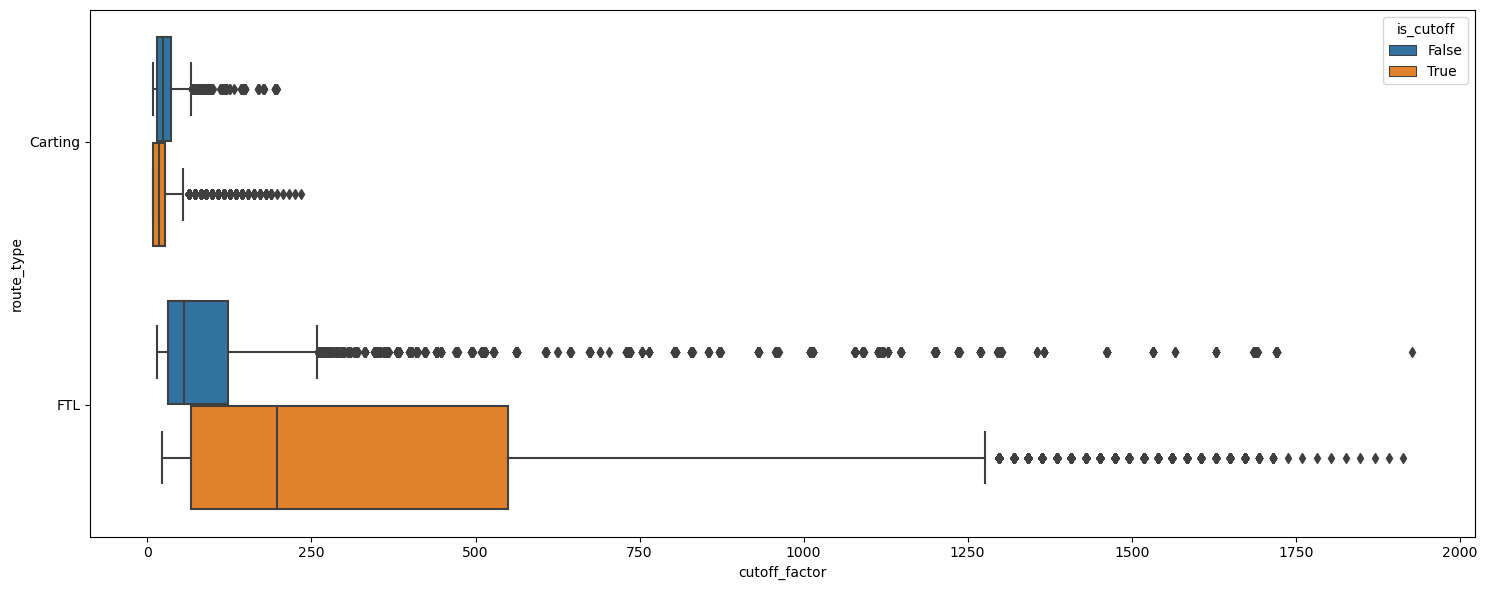

In [81]:
plt.figure(figsize=(15, 6))

sns.boxplot(data = df, hue = 'is_cutoff', x='cutoff_factor', 
            y='route_type')

plt.tight_layout()
plt.show()

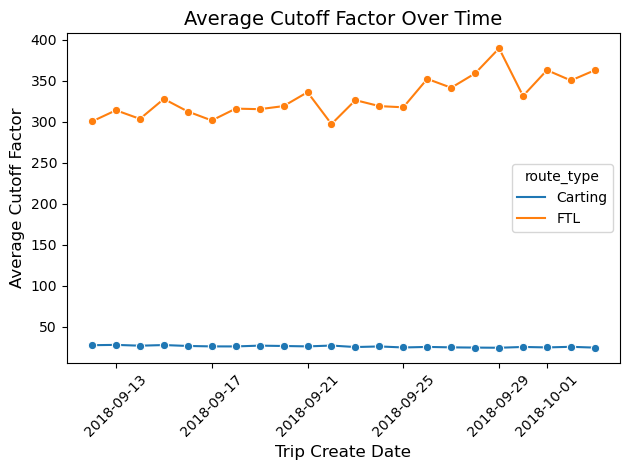

In [289]:
daily_cutoff_factor = df.groupby(['trip_creation_time_date', 'route_type'])['cutoff_factor'].mean().reset_index()

sns.lineplot(data=daily_cutoff_factor, x='trip_creation_time_date', y='cutoff_factor', hue='route_type', marker="o")

plt.title('Average Cutoff Factor Over Time', fontsize=14)
plt.xlabel('Trip Create Date', fontsize=12)
plt.ylabel('Average Cutoff Factor', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Observations & Inferences:**
- There is no significant correlation between `time_diff_other` and `cutoff_factor`
- Meanwhile, `time_diff` and `cutoff_factor` are highly correlated.
    - It can be inferred that the `cutoff_factor` is some kind of index that shows the performance of the trip.<br>
    Higher the `cutoff_factor`, worse the performance — because the `time_diff` will also be very high<br>
    That means, `cutoff_timestamp` is probably the marginal time (internally decided by Delhivery for performance matrix) by when the delivery is expected to happen and if any delay, it will be givena a score accordingly (`cutoff_factor` in this case)
    - So inoder to imporove performance, **Delhivery should aim to reduce the `cutoff_factor` variable to min possible**
- The `cutoff_factor` is not showing any significant pattern with `is_cutoff`<br>
Although, with FTL route_type, the cutoff_factor is more than in case of Carting

In [82]:
df.drop(columns=['time_diff_other'], inplace=True)

## `factor` column

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   data                            144316 non-null  object         
 1   trip_creation_time              144316 non-null  datetime64[ns] 
 2   route_schedule_uuid             144316 non-null  object         
 3   route_type                      144316 non-null  object         
 4   trip_uuid                       144316 non-null  object         
 5   source_center                   144316 non-null  object         
 6   source_name                     144316 non-null  object         
 7   destination_center              144316 non-null  object         
 8   destination_name                144316 non-null  object         
 9   od_start_time                   144316 non-null  datetime64[ns] 
 10  od_end_time                     144316 non-null  

In [84]:
corr_cols = list(df.select_dtypes(include=['number', 'datetime64[ns]']).columns)
corr_cols

['trip_creation_time',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'cutoff_factor',
 'cutoff_timestamp',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor',
 'segment_actual_time_cumsum',
 'segment_osrm_time_cumsum',
 'segment_osrm_distance_cumsum',
 'waiting_time',
 'trip_creation_time_hour',
 'time_diff']

In [85]:
# Is 'factor' correlated to any feature?

df[corr_cols].corr()['factor'].reset_index()

,index,factor
0,trip_creation_time,0.005630
1,od_start_time,0.005115
2,od_end_time,0.002368
3,start_scan_to_end_scan,-0.023648
4,cutoff_factor,-0.064684
5,cutoff_timestamp,-0.000321
6,actual_distance_to_destination,-0.064869
7,actual_time,0.033150
8,osrm_time,-0.069198
9,osrm_distance,-0.065510


**Observations & Inferences:**
- `factor` is not significantly correlated to any of the numeric or datetime features
- It shows moderate positive correlations (0.5) with `segment_actual_time` and `segment_factor` features

## Distance analysis

In [86]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'waiting_time',
       'trip_creation_time_date', 'trip_creation_time_hour',
       'source_name_state', 'destination_name_state', 'time_diff'],
      dtype='object')

In [87]:
# Distance parameters

import re

dist_cols = np.array([x for x in df.columns if re.match(r'.*distance.*', x)])

In [88]:
for i in dist_cols:
    print(i)

actual_distance_to_destination
osrm_distance
segment_osrm_distance
segment_osrm_distance_cumsum


In [89]:
df[dist_cols].head(10)

,actual_distance_to_destination,osrm_distance,segment_osrm_distance,segment_osrm_distance_cumsum
0,10.435660,11.9653,11.9653,11.9653
1,18.936842,21.7243,9.7590,21.7243
2,27.637279,32.5395,10.8152,32.5395
3,36.118028,45.5620,13.0224,45.5619
4,39.386040,54.2181,3.9153,49.4772
5,10.403038,12.1171,12.1171,12.1171
6,18.045481,21.2890,9.1719,21.2890
7,28.061896,35.8252,14.5362,35.8252
8,38.939167,47.1900,11.3648,47.1900
9,43.595802,53.2334,6.0434,53.2334


In [90]:
# Correlation of distance parameters among themselves

df[dist_cols].corr()

,actual_distance_to_destination,osrm_distance,segment_osrm_distance,segment_osrm_distance_cumsum
actual_distance_to_destination,1.000000,0.997147,0.232832,0.990824
osrm_distance,0.997147,1.000000,0.240373,0.992741
segment_osrm_distance,0.232832,0.240373,1.000000,0.244490
segment_osrm_distance_cumsum,0.990824,0.992741,0.244490,1.000000


**Observations & Inferences:**
- `actual_distance_to_destination`, `osrm_distance` and `segment_osrm_distance_cumsum` are very strongly correlated to each other (0.99 correlation cofficient)
- `segment_osrm_distance` doesn't appear to be correlated with any of the distance paramenters
    - This makes sence because all the other distance parameters are cummulative sum (aggregated value) but `segment_osrm_distance` is direct values
- As we can see, `actual_distance_to_destination` and `osrm_distance` are strongly correlated. This means:
    - The delivery trip takes the shortest path that is proposed by the OSRM engine.
    - This is good for the company, as it reduces both transportation fuel cost and delivers in the minimum possible time
- Also, the `segment_osrm_distance_cumsum` now appears to be an additional feture (as the `actual_distance_to_destination` feature represents the similar value)<br>
We can choose to keep it for any future requirements though

# Handeling outliers

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   data                            144316 non-null  object         
 1   trip_creation_time              144316 non-null  datetime64[ns] 
 2   route_schedule_uuid             144316 non-null  object         
 3   route_type                      144316 non-null  object         
 4   trip_uuid                       144316 non-null  object         
 5   source_center                   144316 non-null  object         
 6   source_name                     144316 non-null  object         
 7   destination_center              144316 non-null  object         
 8   destination_name                144316 non-null  object         
 9   od_start_time                   144316 non-null  datetime64[ns] 
 10  od_end_time                     144316 non-null  

In [92]:
num_cols

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

Let's add following columns to the list of num_cols for outlier analysis:
- segment_actual_time_cumsum
- segment_osrm_time_cumsum
- segment_osrm_distance_cumsum
- waiting_time

In [93]:
# convert 'waiting_time' column into minutes

df['waiting_time_minutes'] = df['waiting_time'].dt.total_seconds()//60

In [94]:
outlier_col = num_cols + ['segment_actual_time_cumsum', 'segment_osrm_time_cumsum', 'segment_osrm_distance_cumsum', 'waiting_time_minutes']
outlier_col

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor',
 'segment_actual_time_cumsum',
 'segment_osrm_time_cumsum',
 'segment_osrm_distance_cumsum',
 'waiting_time_minutes']

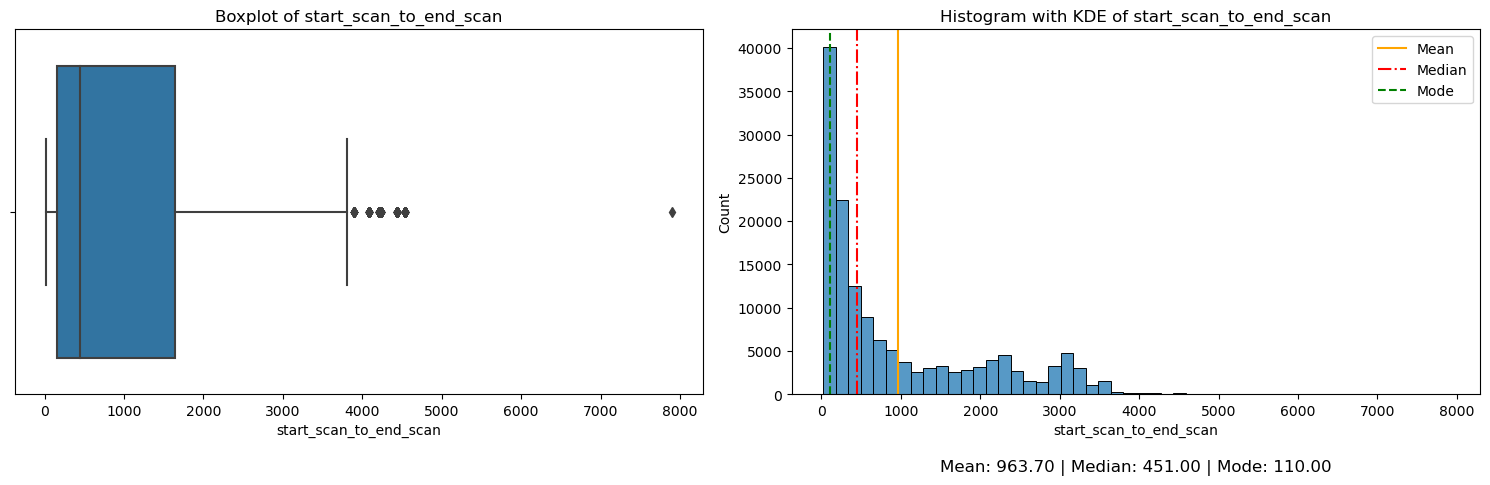

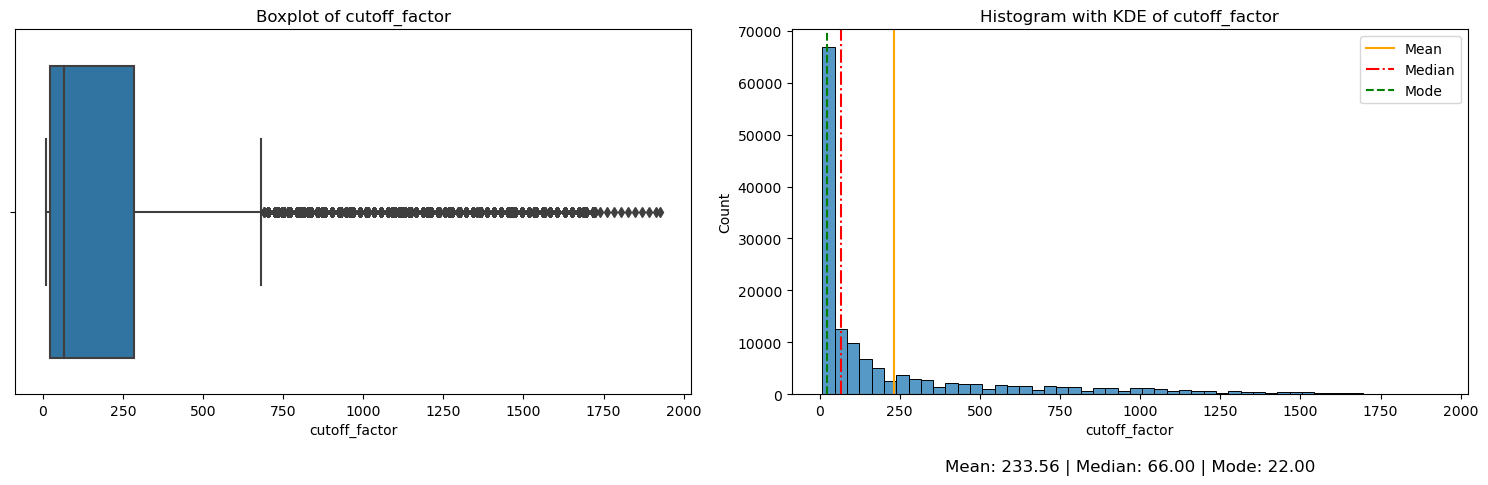

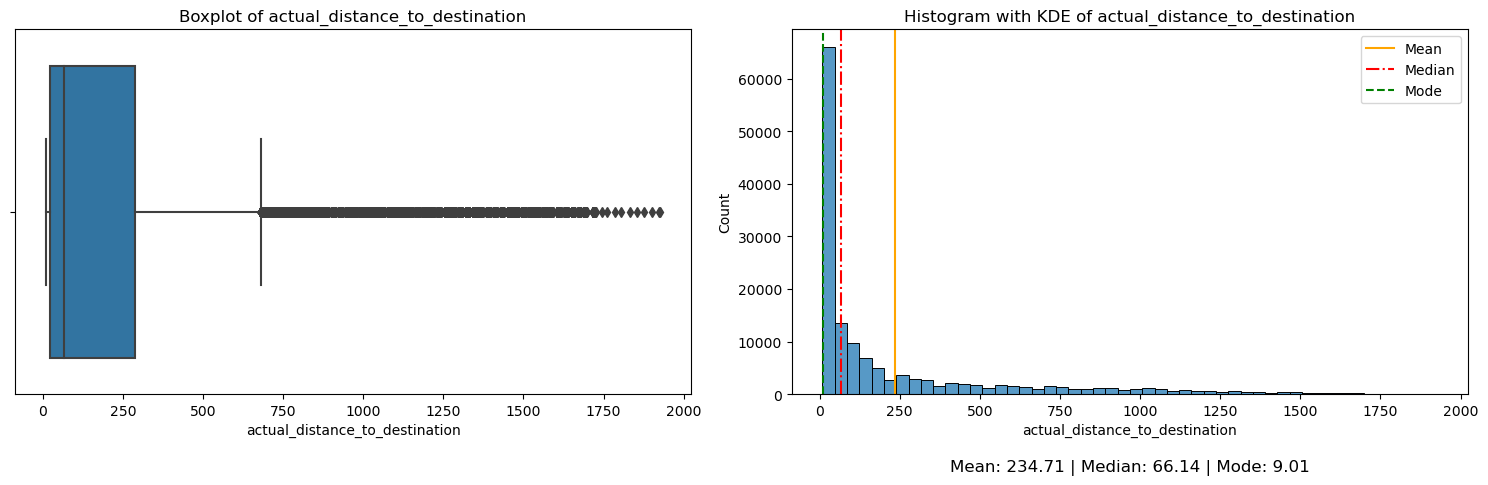

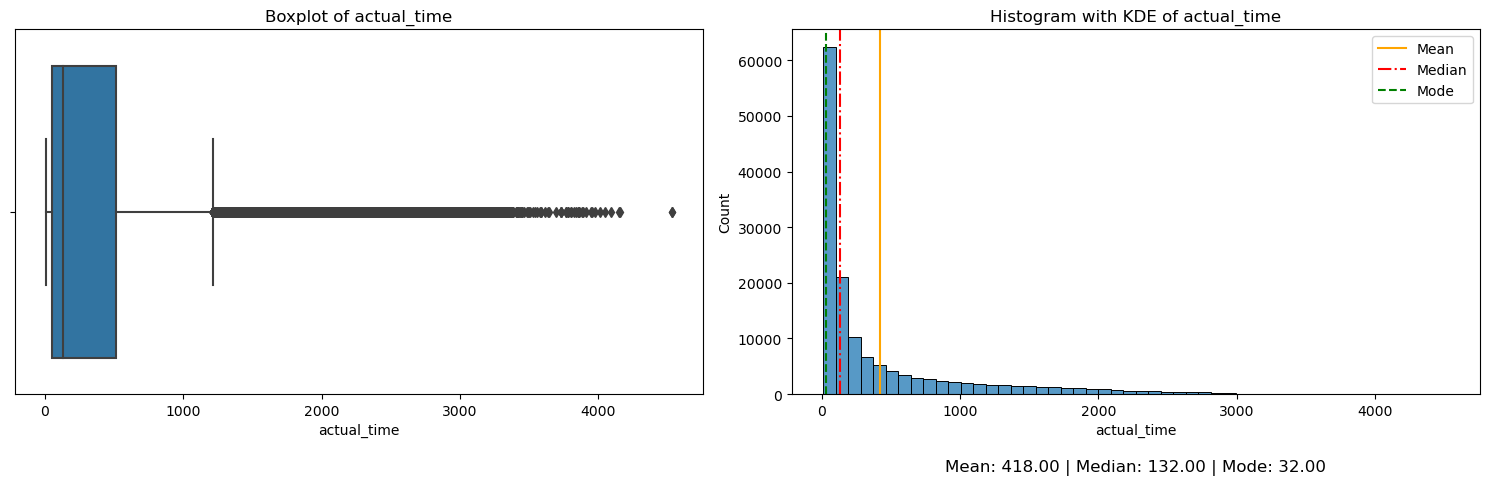

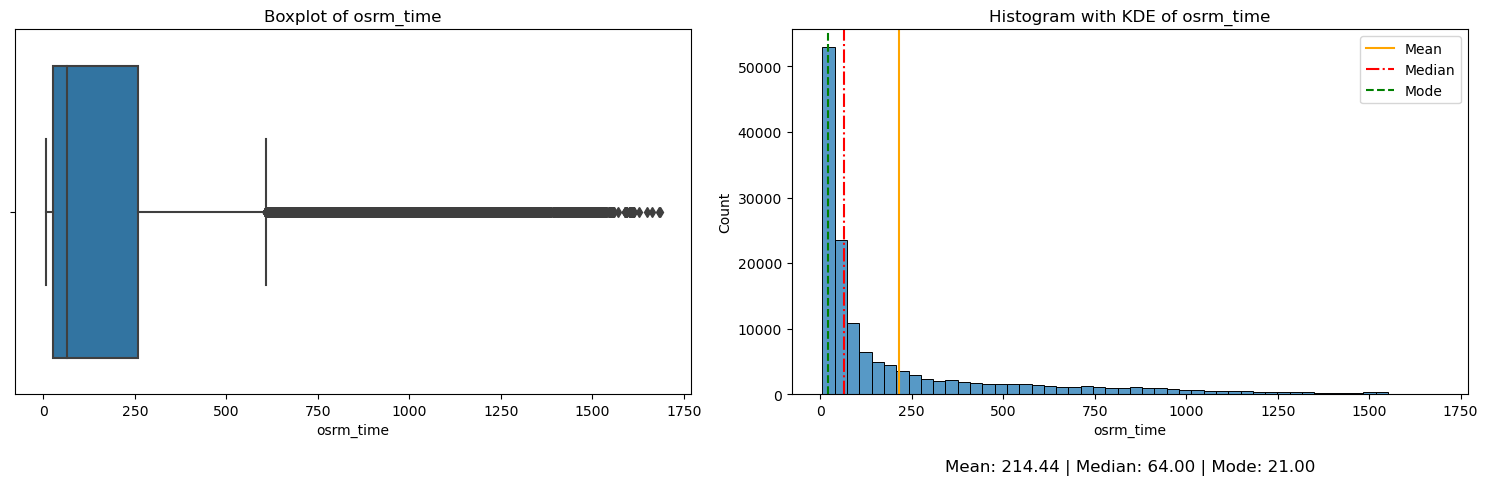

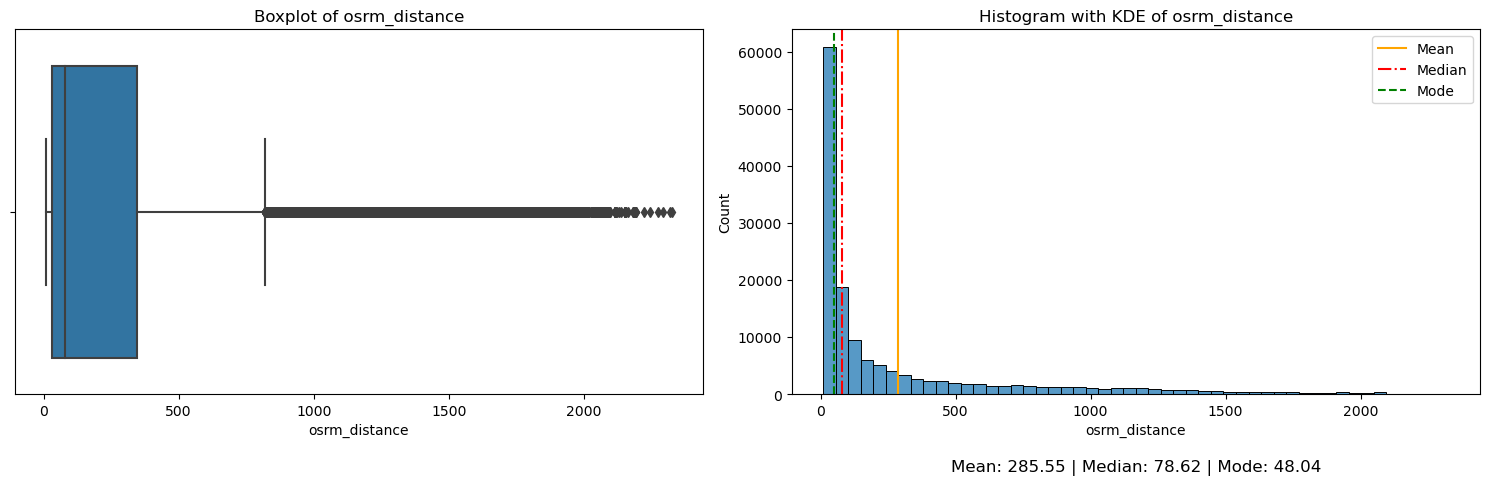

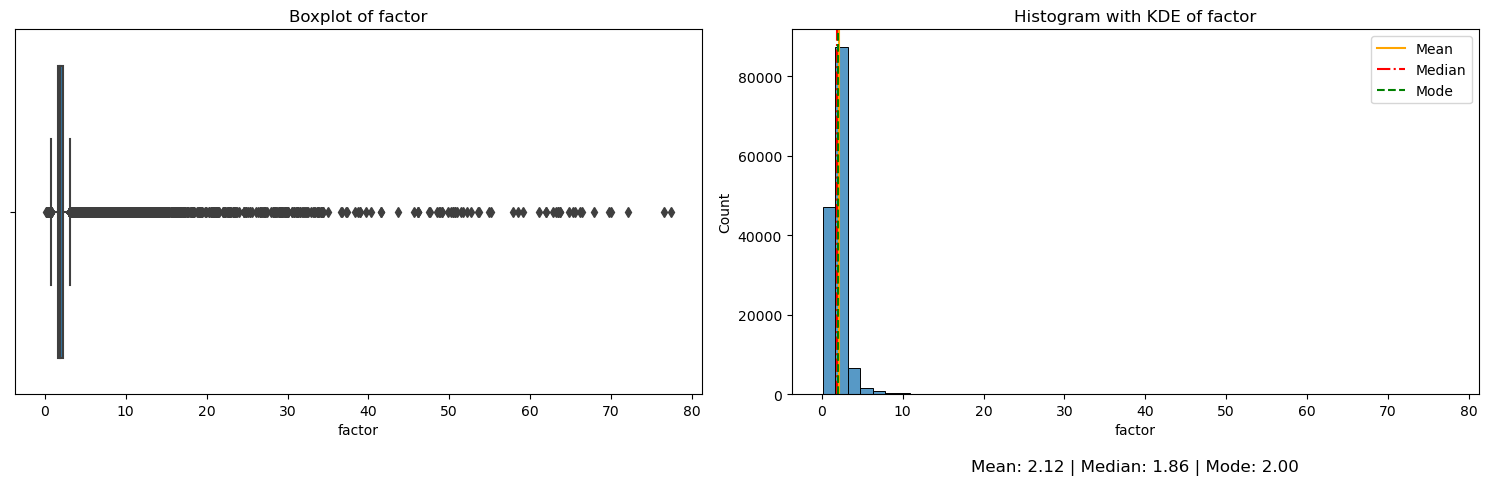

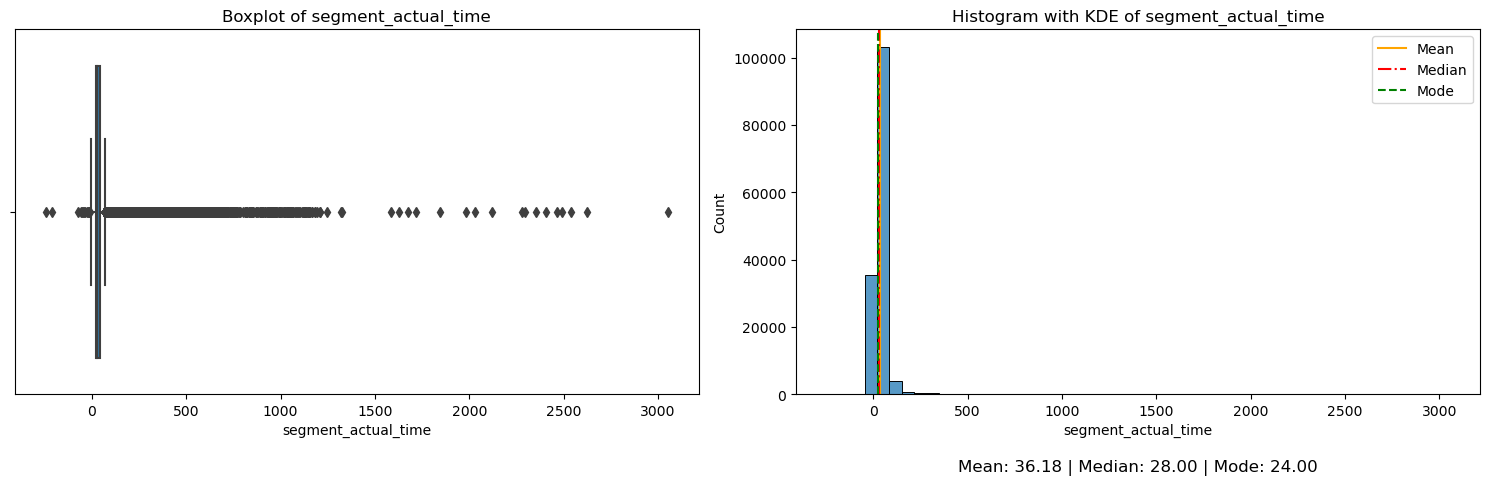

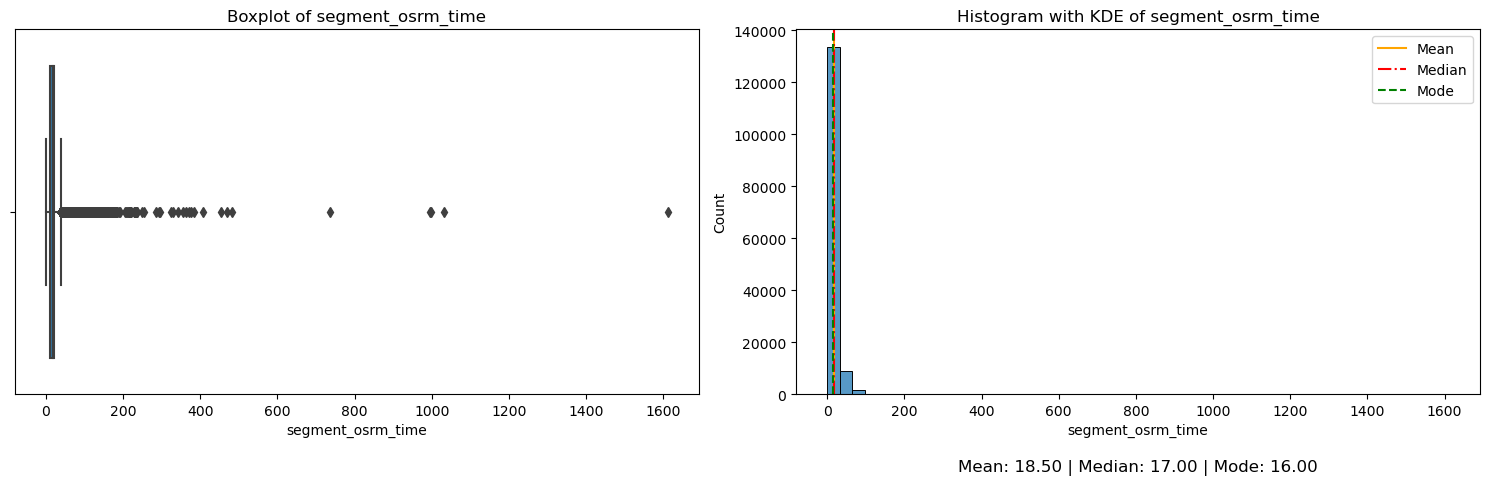

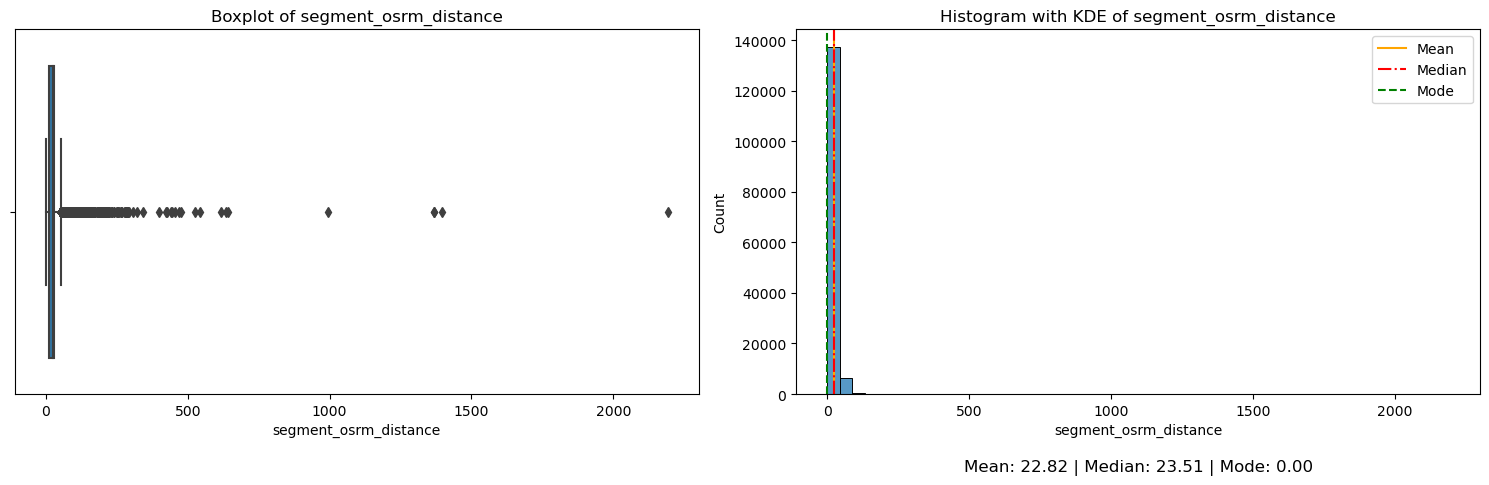

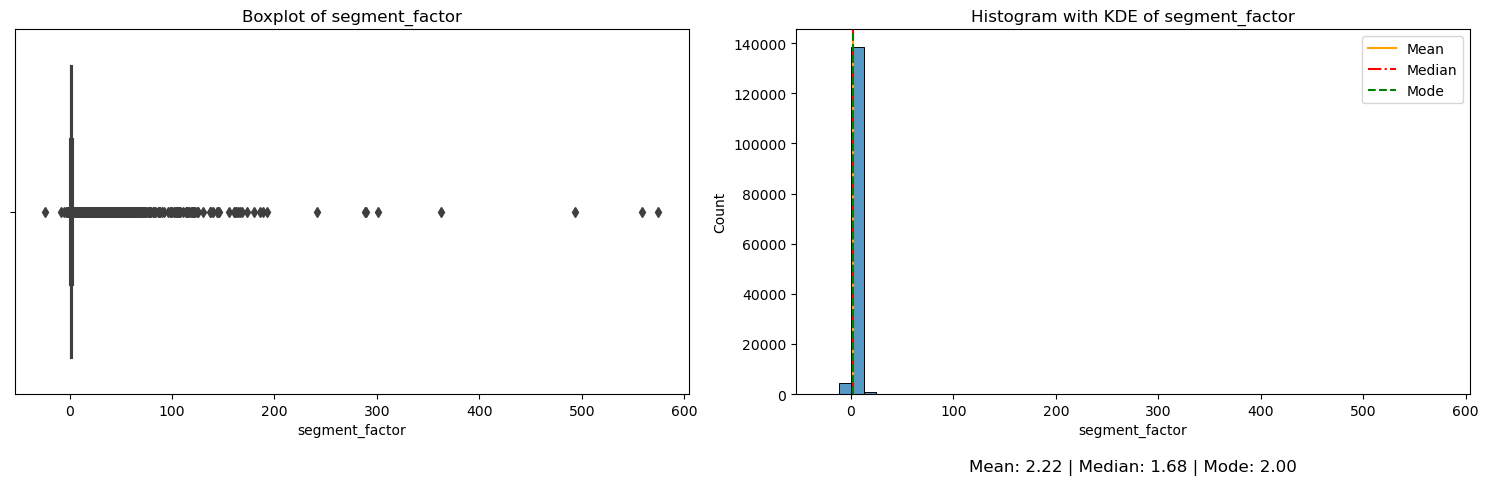

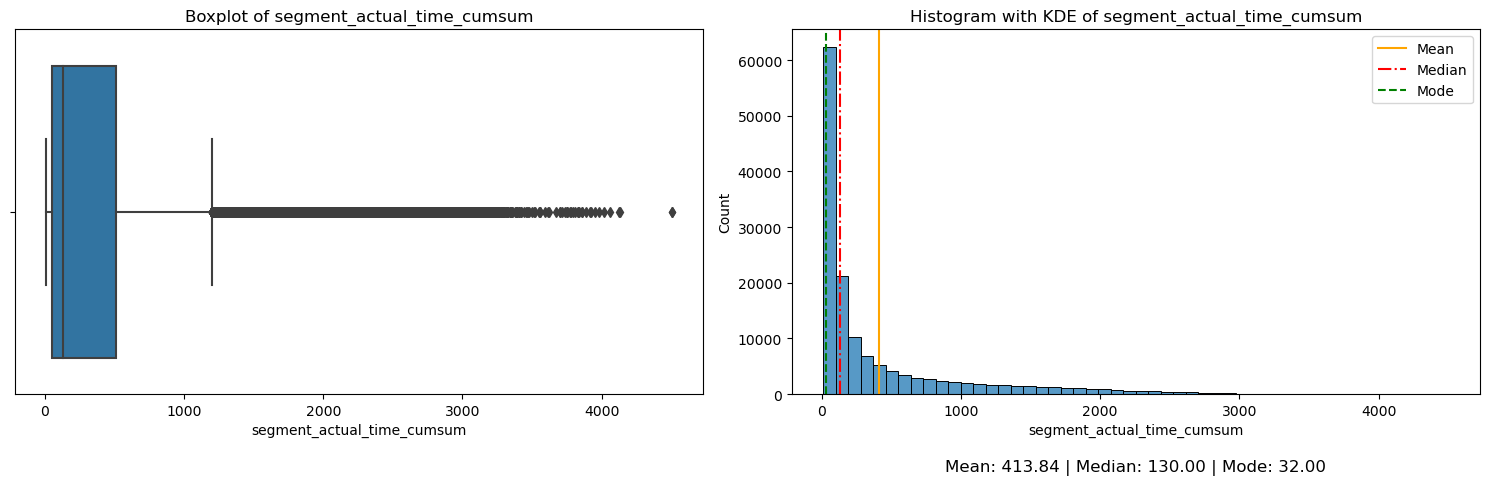

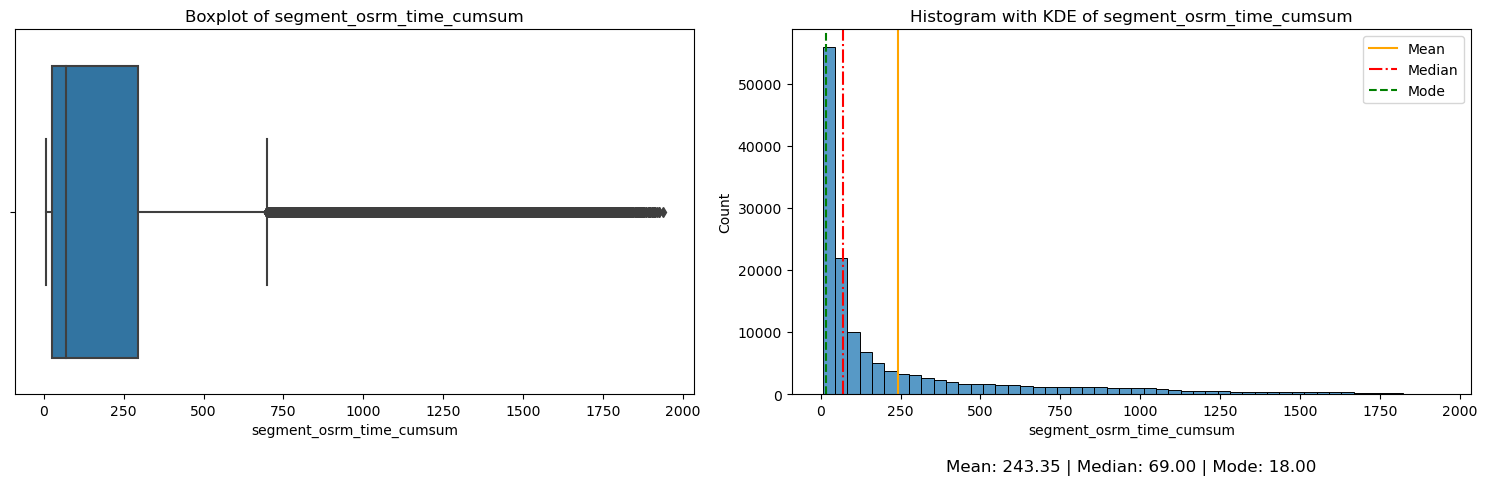

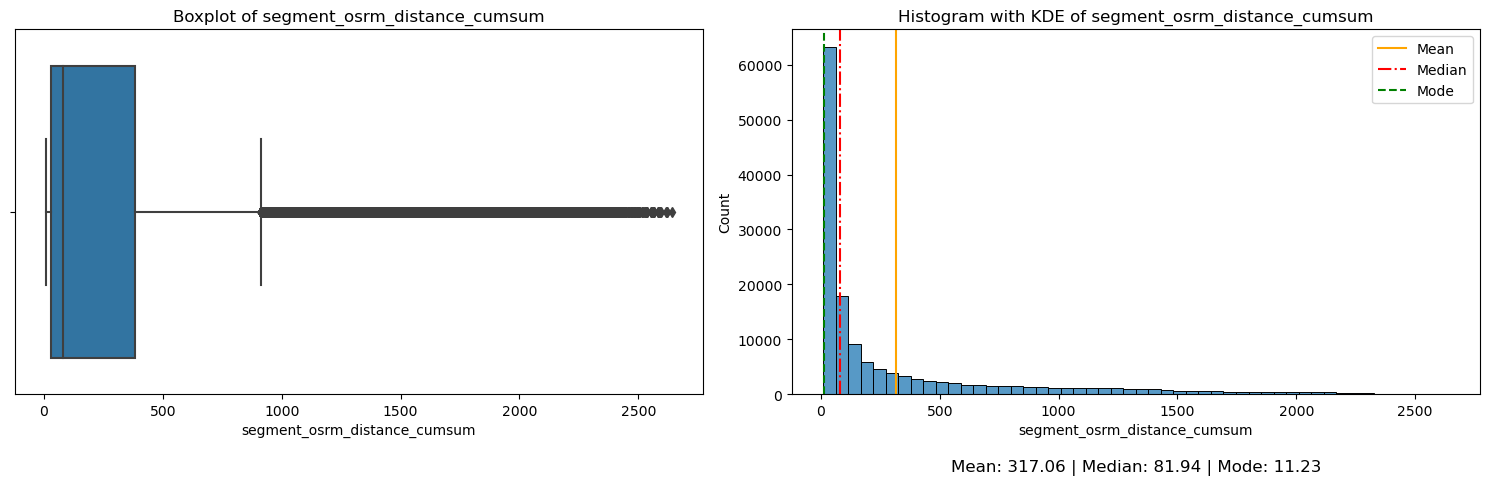

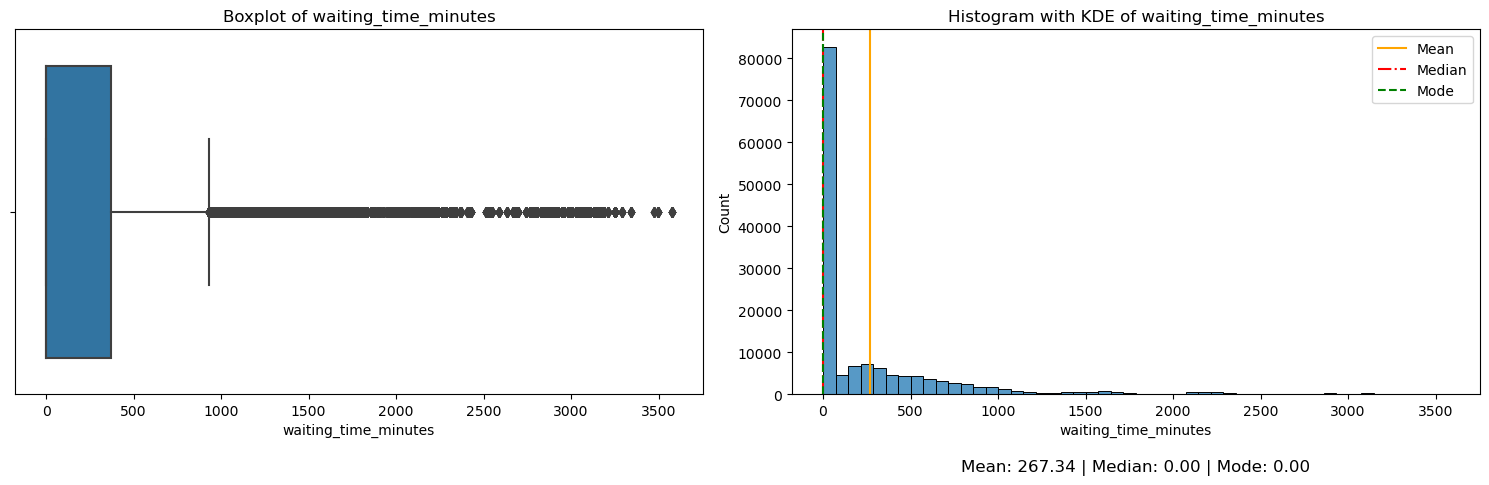

In [95]:
# Plot boxplot and histplot side-by-side for each of the columns, with user defined functions

for col in outlier_col:
    univariate_plot(df[col], col)

**Observations & Inference:**
- All the data is hevealy right skewed<br>
This is an expected behavior as most of the columns are either distance or time variables, and they have a natural tendency of skin towards the right.

**Let's remove these outliers using IQR method**

In [96]:
# Calculate Q1, Q3 and IQR

q1 = np.percentile(df[outlier_col], 25)
q3 = np.percentile(df[outlier_col], 75)

iqr = q3 - q1

# lower and upper whiskers
lw = q1 - (1.5 * iqr)
uw = q3 + (1.5 * iqr)

In [97]:
# remove outliers from the outliers specified columns and retract the entire dataframe

df_iqr = df[~((df[outlier_col] < lw) | (df[outlier_col] > uw)).any(axis=1)]

In [98]:
print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {df_iqr.shape}")

Original data shape: (144316, 35)
Filtered data shape: (63273, 35)


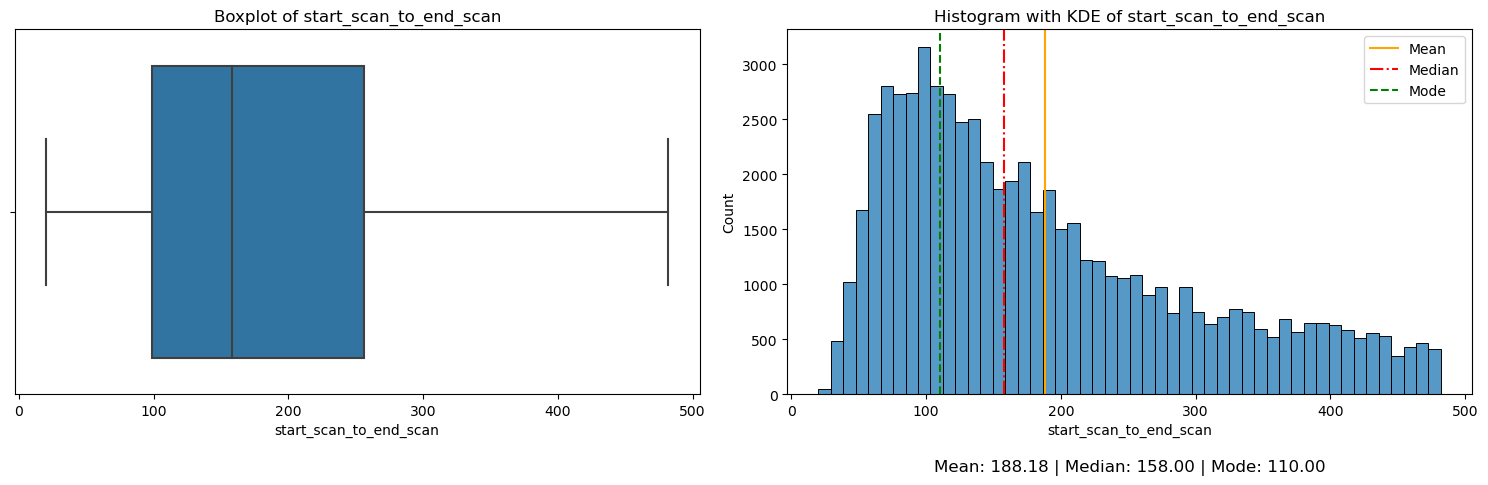

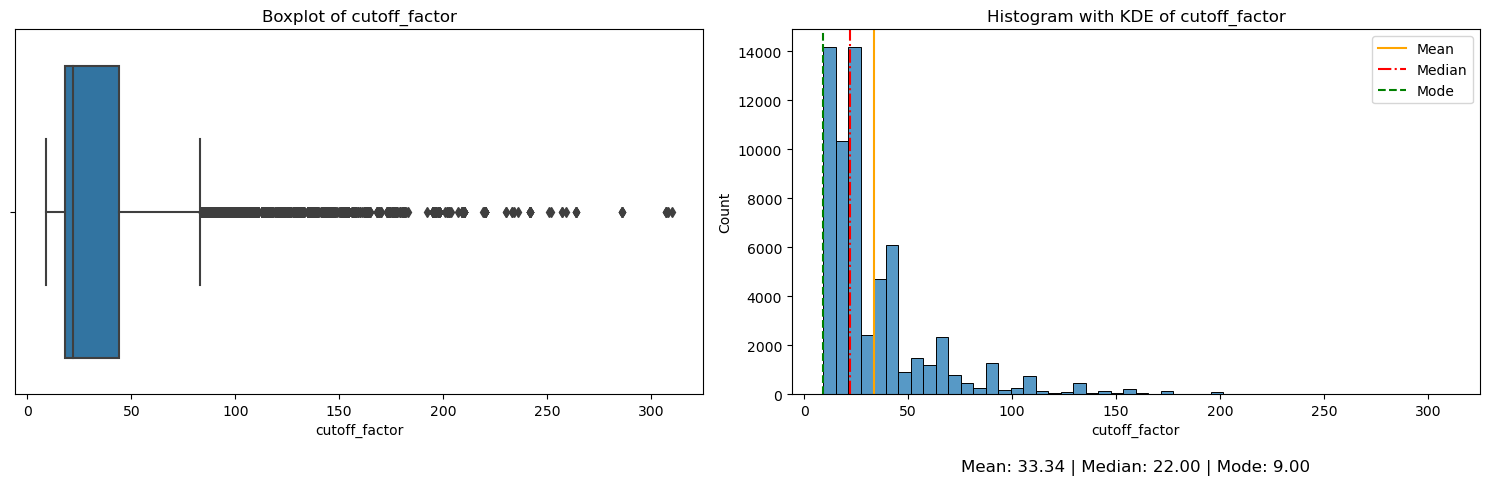

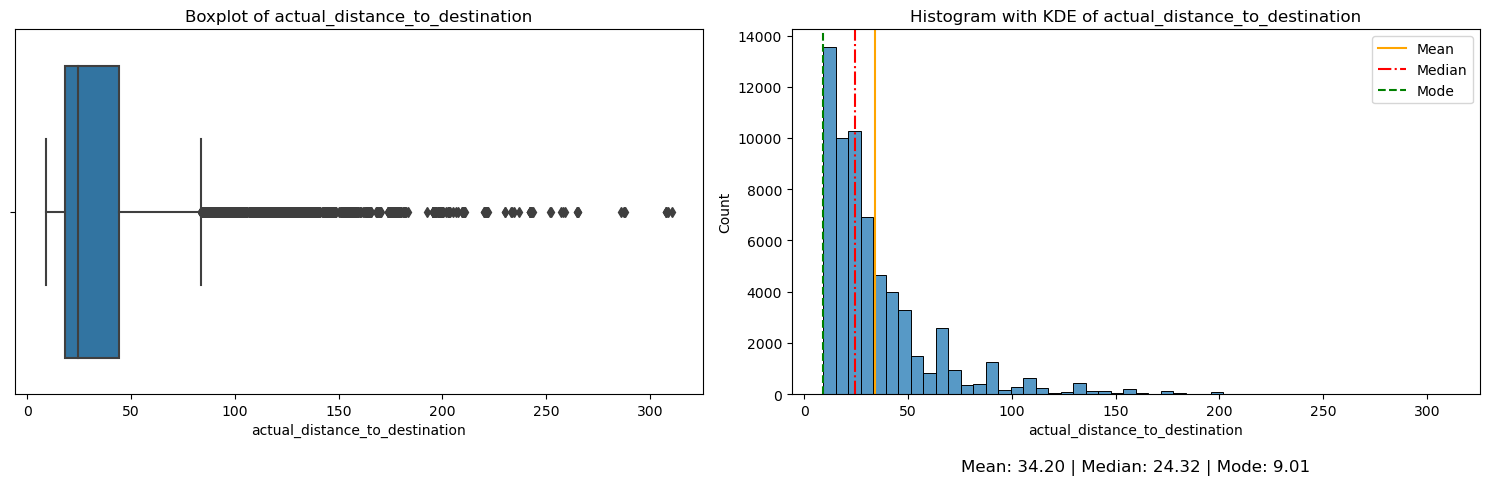

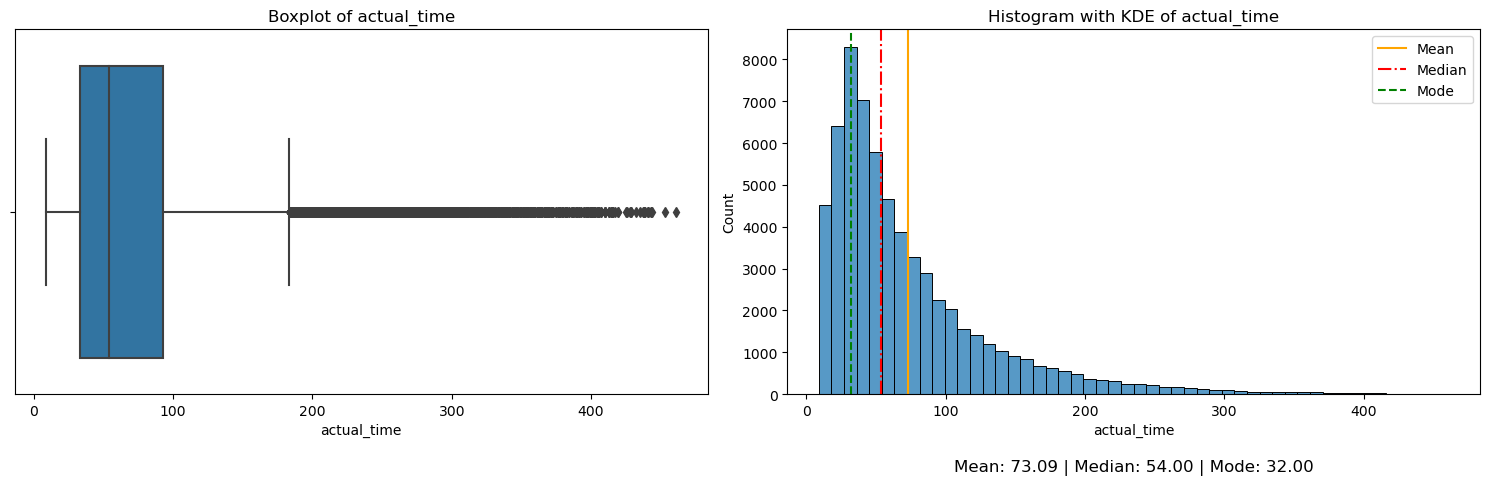

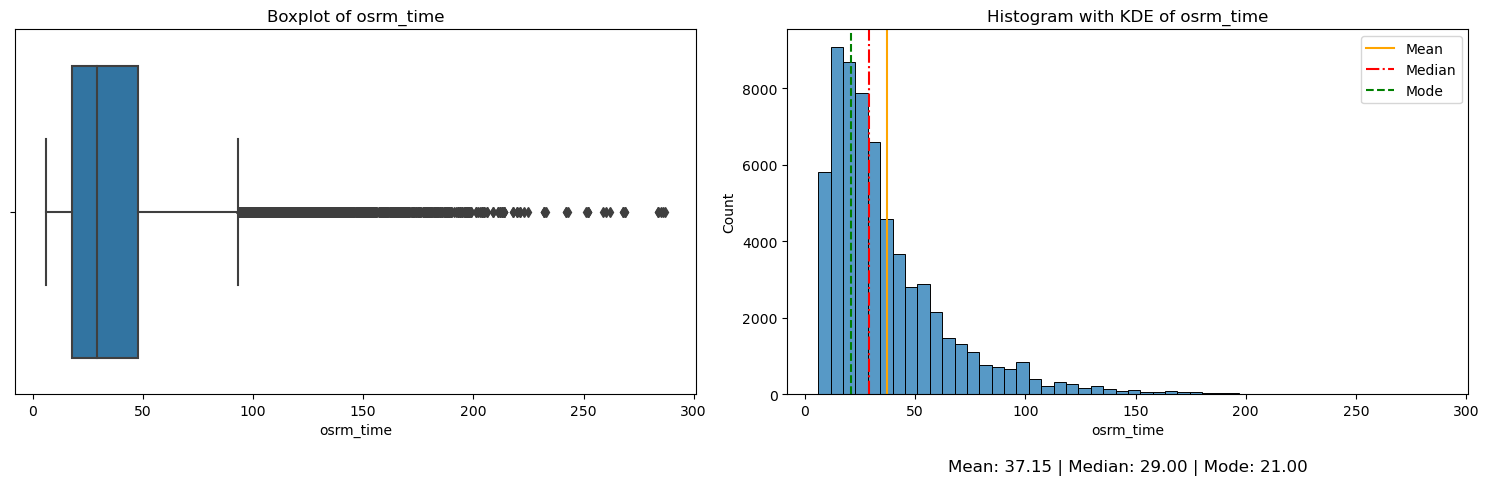

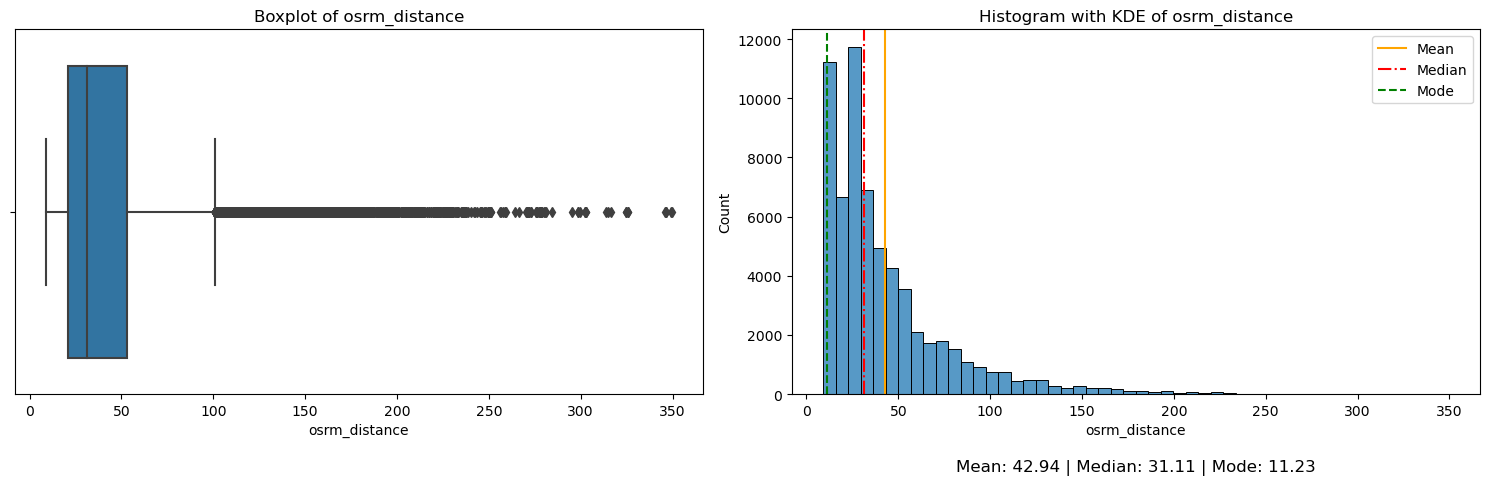

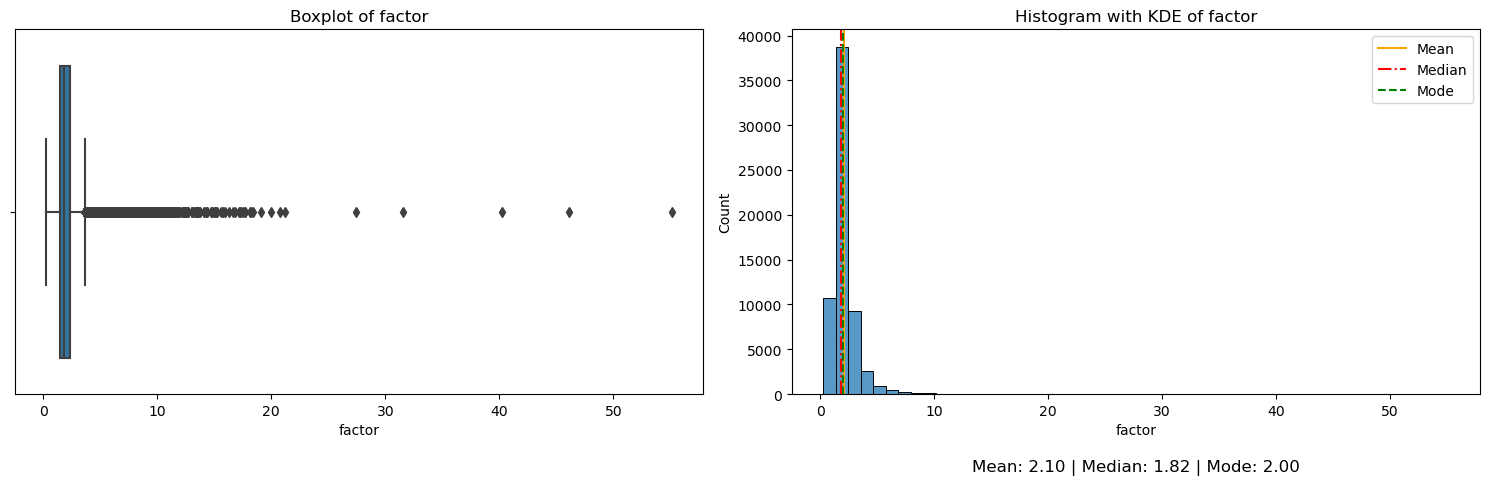

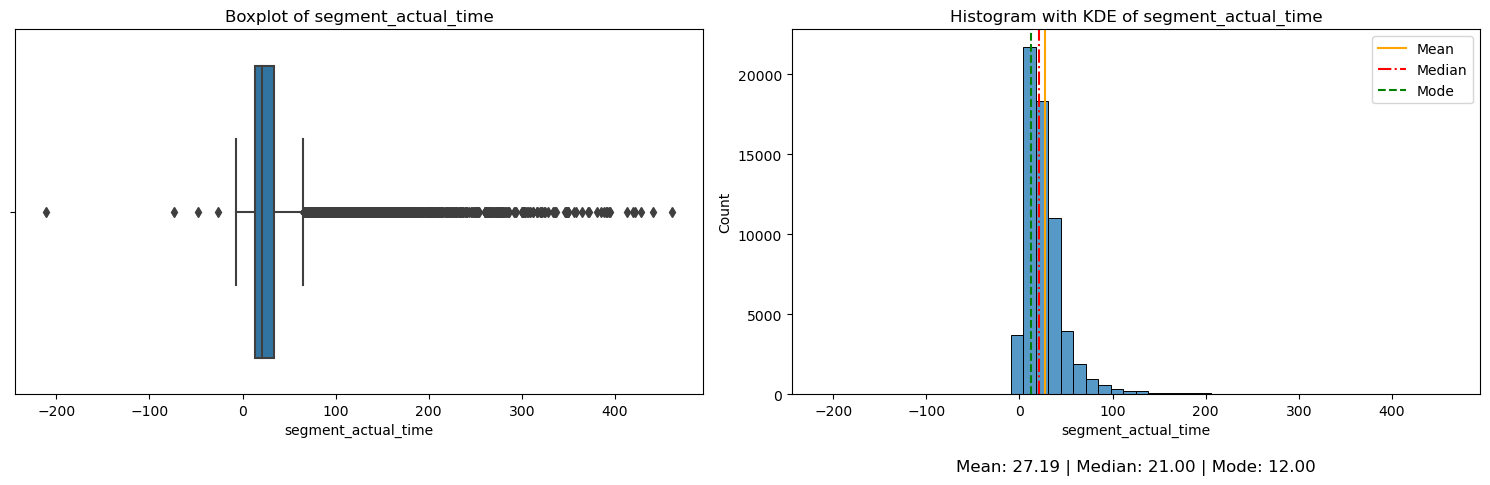

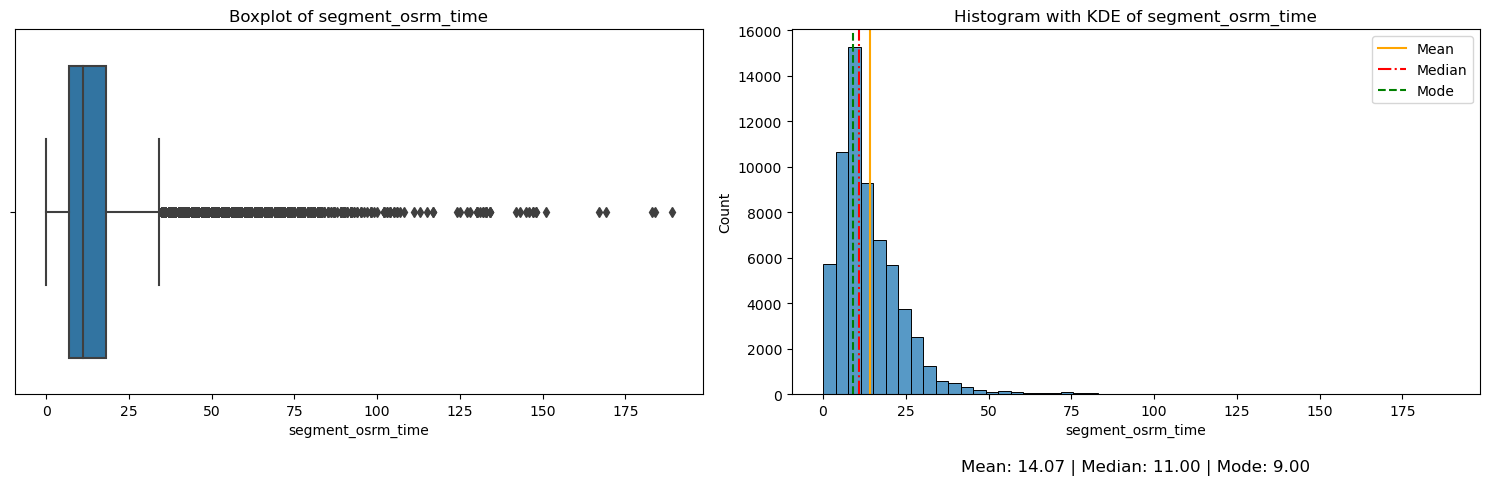

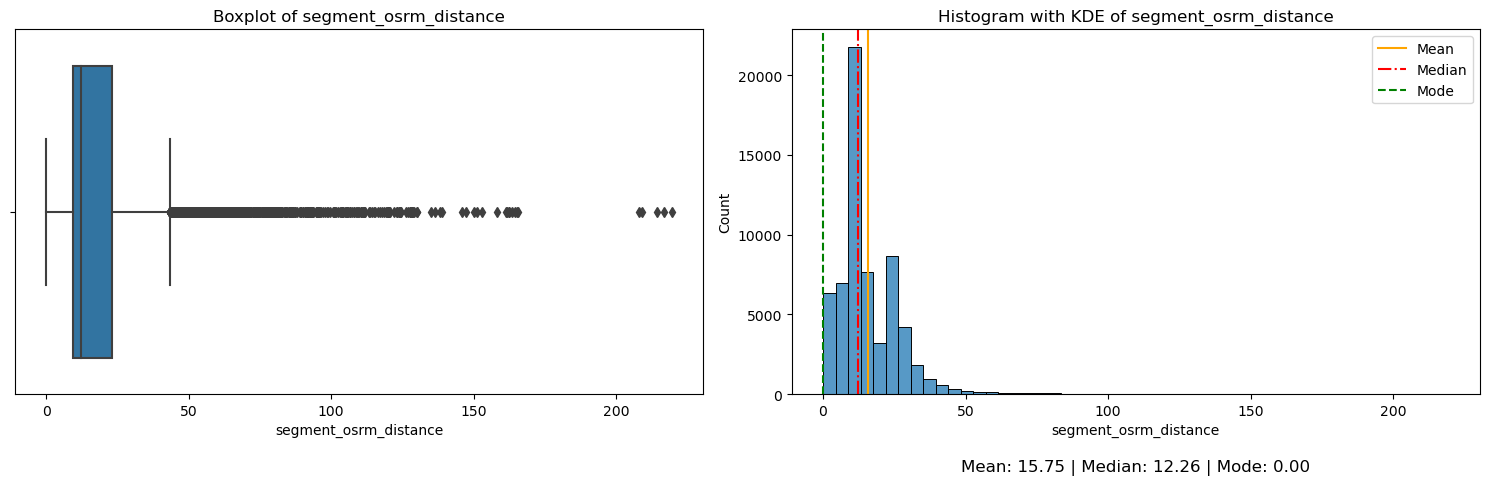

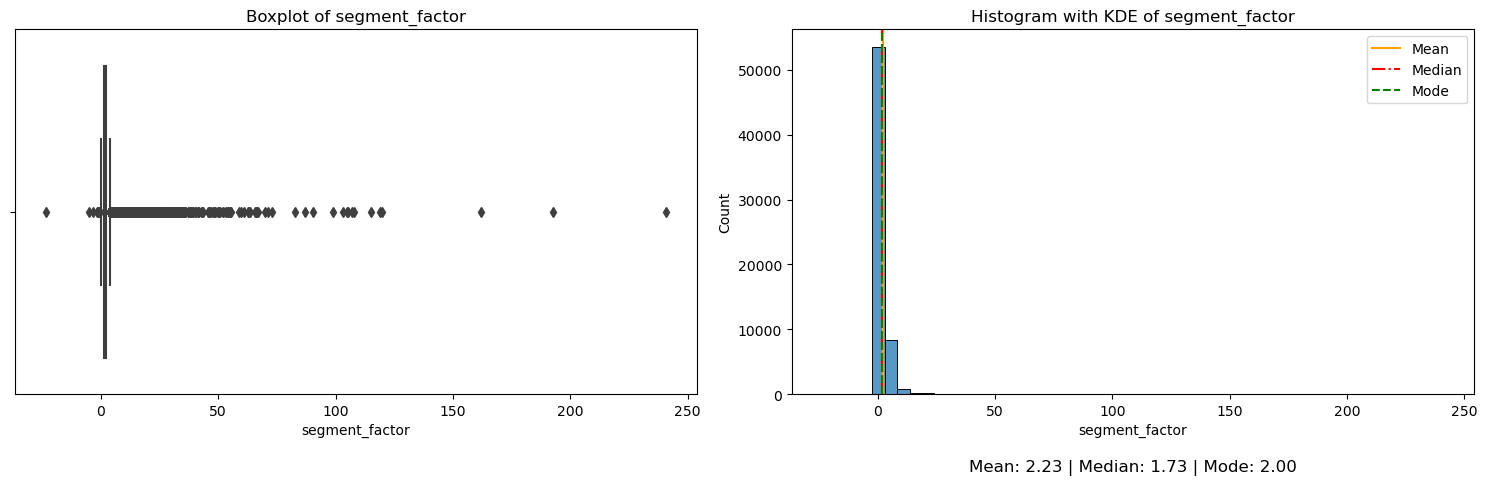

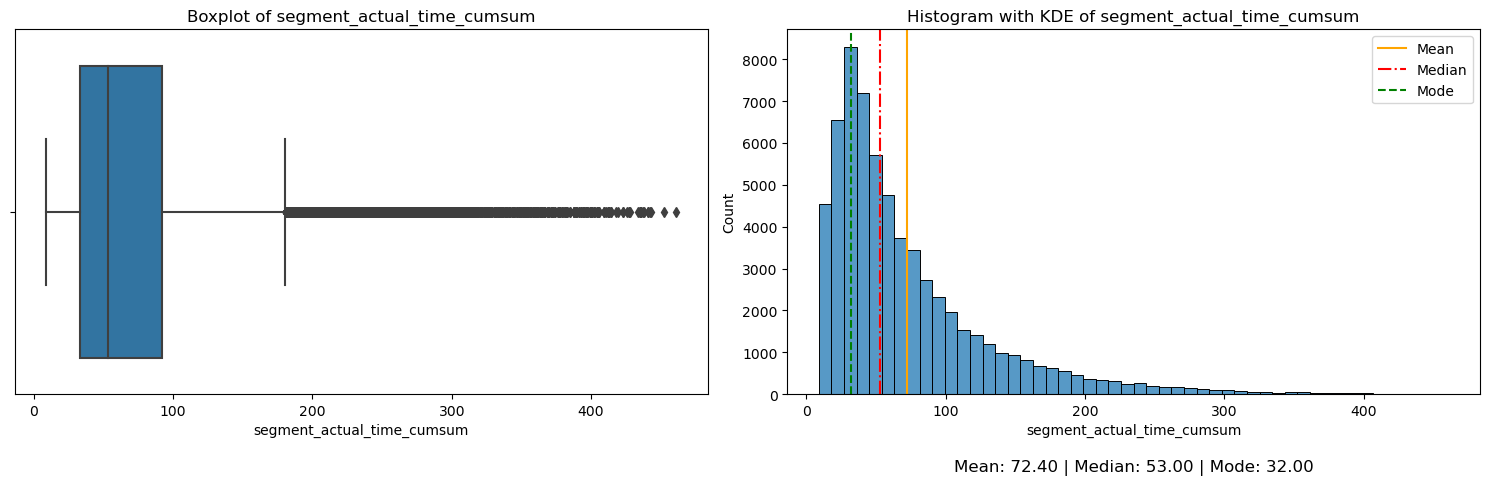

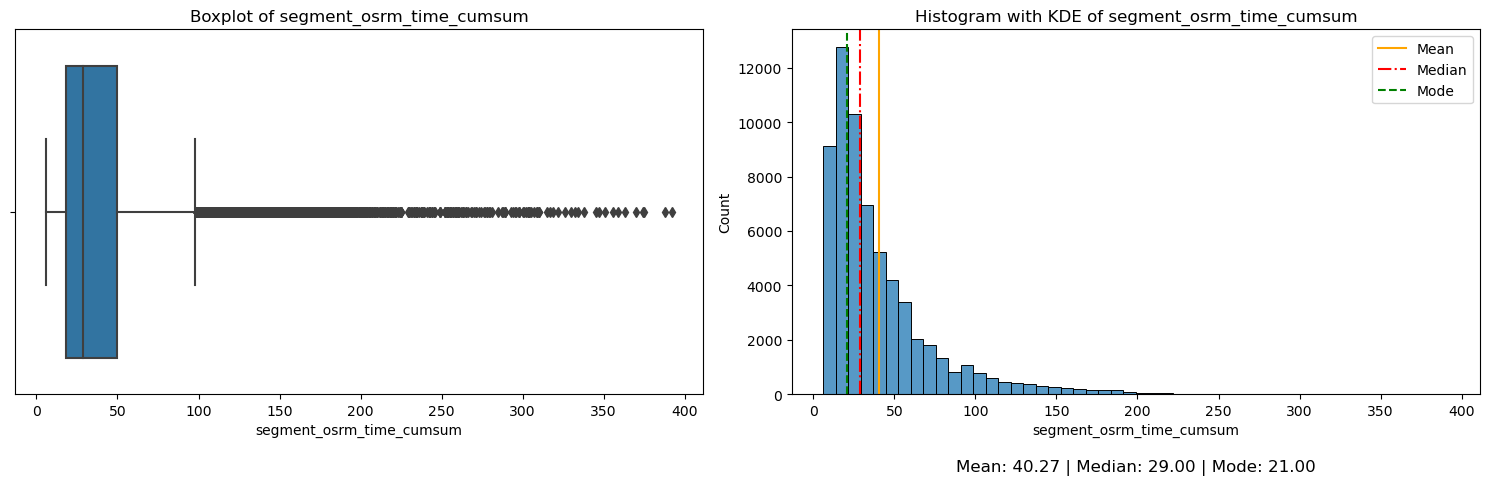

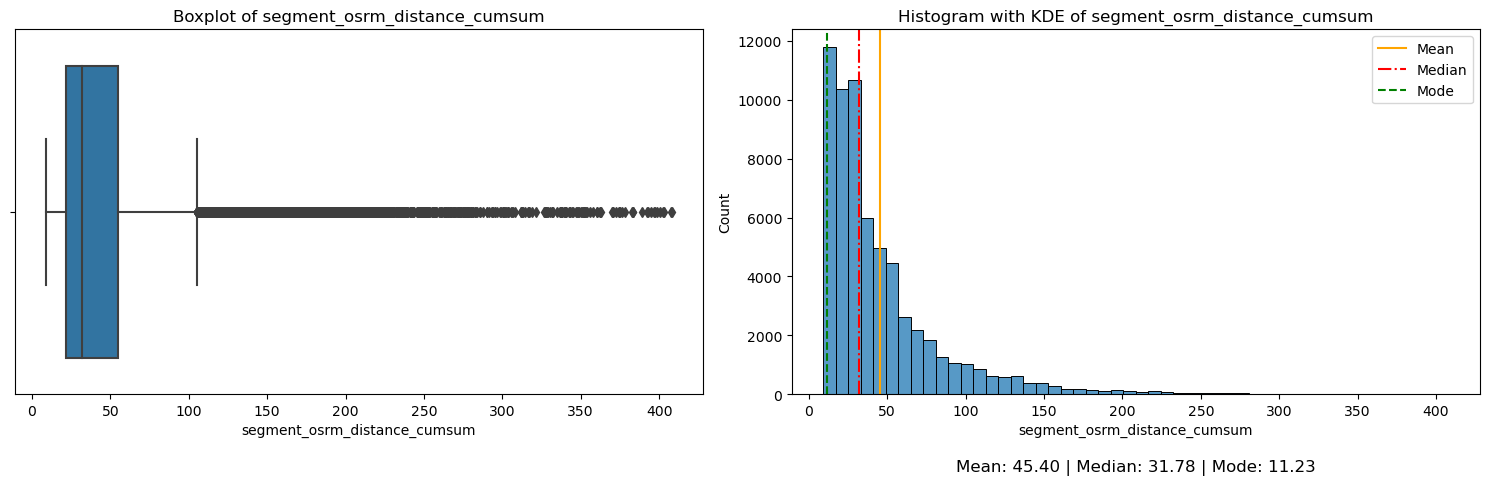

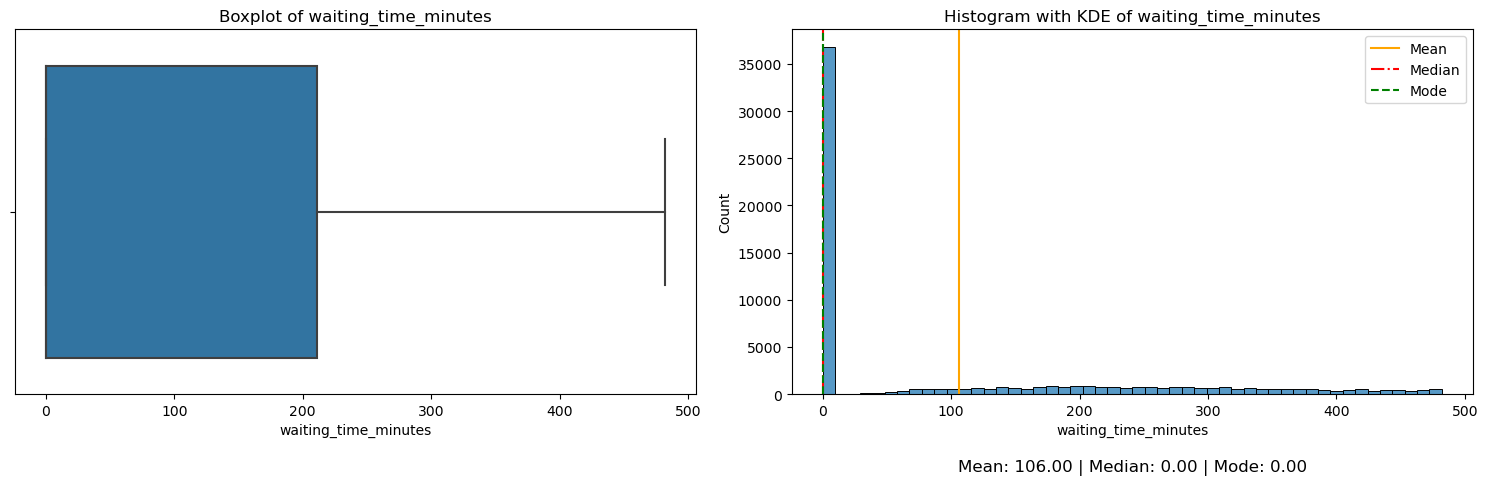

In [99]:
# Reploting the outlier columns in the data set after removing outliers

for col in outlier_col:
    univariate_plot(df_iqr[col], col)

**Observations & Inferences:**
- Even after removing the outliers, the `df_iqr` still has outliers (see box plot)<br>
This is because of the natural skewness of the underlying distribution patter of the columns.
- Although 2 columns doens't seem to have any outliers now:
    - start_scan_to_end_scan
    - waiting_time_minutes

# Label encoding

In [100]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63273 entries, 0 to 144866
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   data                            63273 non-null  object         
 1   trip_creation_time              63273 non-null  datetime64[ns] 
 2   route_schedule_uuid             63273 non-null  object         
 3   route_type                      63273 non-null  object         
 4   trip_uuid                       63273 non-null  object         
 5   source_center                   63273 non-null  object         
 6   source_name                     63273 non-null  object         
 7   destination_center              63273 non-null  object         
 8   destination_name                63273 non-null  object         
 9   od_start_time                   63273 non-null  datetime64[ns] 
 10  od_end_time                     63273 non-null  datetime64[ns]

Label encoding is done on categorical variables having 2 categories<br>
We have only 1 categorical column **`route_type`**

In [101]:
df_iqr['route_type'].value_counts()

route_type
Carting    41175
FTL        22098
Name: count, dtype: int64

In [102]:
label_encoder = LabelEncoder()

df_iqr['route_type'] = label_encoder.fit_transform(df_iqr['route_type'])
df_iqr['route_type'].value_counts()

/var/folders/6c/35m01ndj6sjbg7_p2xtghp140000gn/T/ipykernel_74805/1027220108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['route_type'] = label_encoder.fit_transform(df_iqr['route_type'])


route_type
0    41175
1    22098
Name: count, dtype: int64

# Hypothesis Testing

In [202]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63273 entries, 0 to 144866
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   data                            63273 non-null  object         
 1   trip_creation_time              63273 non-null  datetime64[ns] 
 2   route_schedule_uuid             63273 non-null  object         
 3   route_type                      63273 non-null  int64          
 4   trip_uuid                       63273 non-null  object         
 5   source_center                   63273 non-null  object         
 6   source_name                     63273 non-null  object         
 7   destination_center              63273 non-null  object         
 8   destination_name                63273 non-null  object         
 9   od_start_time                   63273 non-null  datetime64[ns] 
 10  od_end_time                     63273 non-null  datetime64[ns]

## `actual_time` vs `osrm_time`

In [203]:
data1 = df_iqr['actual_time']
data2 = df_iqr['osrm_time']

In [204]:
# Let's check the normality of both the distribution

In [205]:
# Taking a sample of 50 as shapiro test is very sensitive to even the slightest deviation which gets very prominent

# Ho : The distribution is normally distributed
# Ha : The distribution is not normally distributed
# ⍺ = 0.05

print(stats.shapiro(data1.sample(50)))
print(stats.shapiro(data2.sample(50)))

ShapiroResult(statistic=0.8093612194061279, pvalue=1.4504884120469796e-06)
ShapiroResult(statistic=0.7347601652145386, pvalue=3.682738736188185e-08)


Since p-value < ⍺<br>
We reject Null hypothesis

In [206]:
len(data1), len(data2)

(63273, 63273)

In [207]:
# Validate the equality of variance

# Ho : Both the distribution have equal variance
# Ha : Both the distribution does not have equale variance
# ⍺ = 0.05

stats.levene(data1.sample(1000), data2.sample(1000))

LeveneResult(statistic=182.4785848960939, pvalue=7.405025090976964e-40)

Since p-value < ⍺<br>
We reject Null hypothesis

We need to perform a non-parametric test in this case. We have 2 options:
- Kolmogorov-Smirnov (KS) Test
- Mann-Whitney U Test

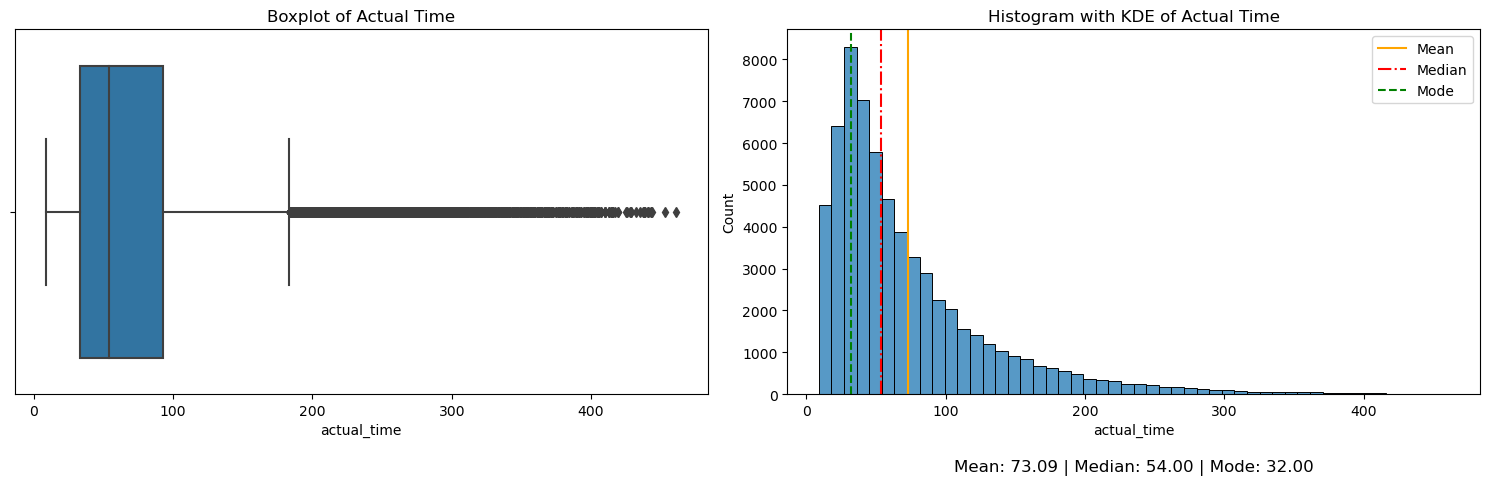

In [208]:
# Distribution pattern of both the variables

univariate_plot(data1, "Actual Time")

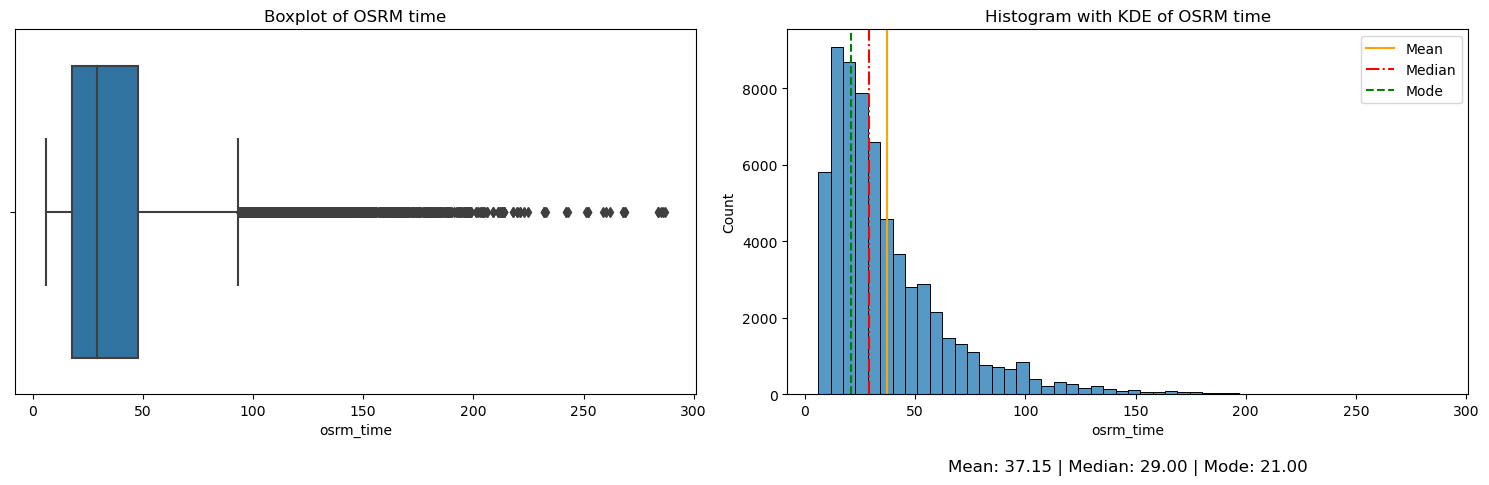

In [209]:
univariate_plot(data2, "OSRM time")

### Kolmogorov-Smirnov (KS) Test

In [222]:
# Ho : Both the data set have similar distribution pattern
# Ha : Both the data set have different distribution pattern
# ⍺ = 0.05

res = stats.kstest(data1.sample(50), data2.sample(50))
print(f"p-value = {res.pvalue}")

if res.pvalue < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

p-value = 4.929118631187453e-07
Reject Ho


### Mann-Whitney U Test

In [223]:
# Ho : Both the data set have equal medians
# Ha : Both the data set have different medians
# ⍺ = 0.05

res = stats.mannwhitneyu(data1.sample(50), data2.sample(50))
print(f"p-value = {res.pvalue}")

if res.pvalue < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

p-value = 0.000565411298646651
Reject Ho


## `actual_time` vs `segment_actual_time_cumsum`

In [224]:
# Normality test
# Taking a sample of 50 as shapiro test is very sensitive to even the slightest deviation which gets very prominent

# Ho : The distribution is normally distributed
# Ha : The distribution is not normally distributed
# ⍺ = 0.05

print(stats.shapiro(df_iqr['actual_time'].sample(50)))
print(stats.shapiro(df_iqr['segment_actual_time_cumsum'].sample(50)))

ShapiroResult(statistic=0.8398439884185791, pvalue=8.306524250656366e-06)
ShapiroResult(statistic=0.7873991131782532, pvalue=4.548190304376476e-07)


Since p-value < ⍺<br>
We reject Null hypothesis

In [229]:
# Validate the equality of variance

# Ho : Both the distribution have equal variance
# Ha : Both the distribution does not have equale variance
# ⍺ = 0.05

stats.levene(df_iqr['actual_time'].sample(1000), df_iqr['segment_actual_time_cumsum'].sample(1000))

LeveneResult(statistic=0.017168167902160327, pvalue=0.8957668585393882)

Since, p-value > ⍺<br>
We fail to reject Null hypothesis

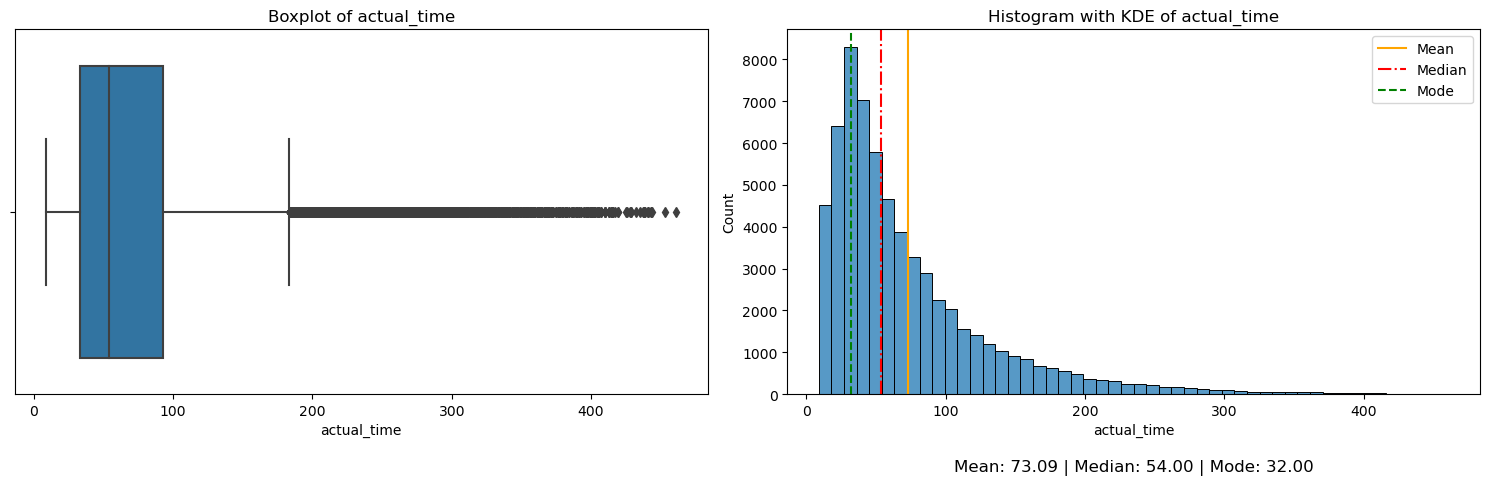

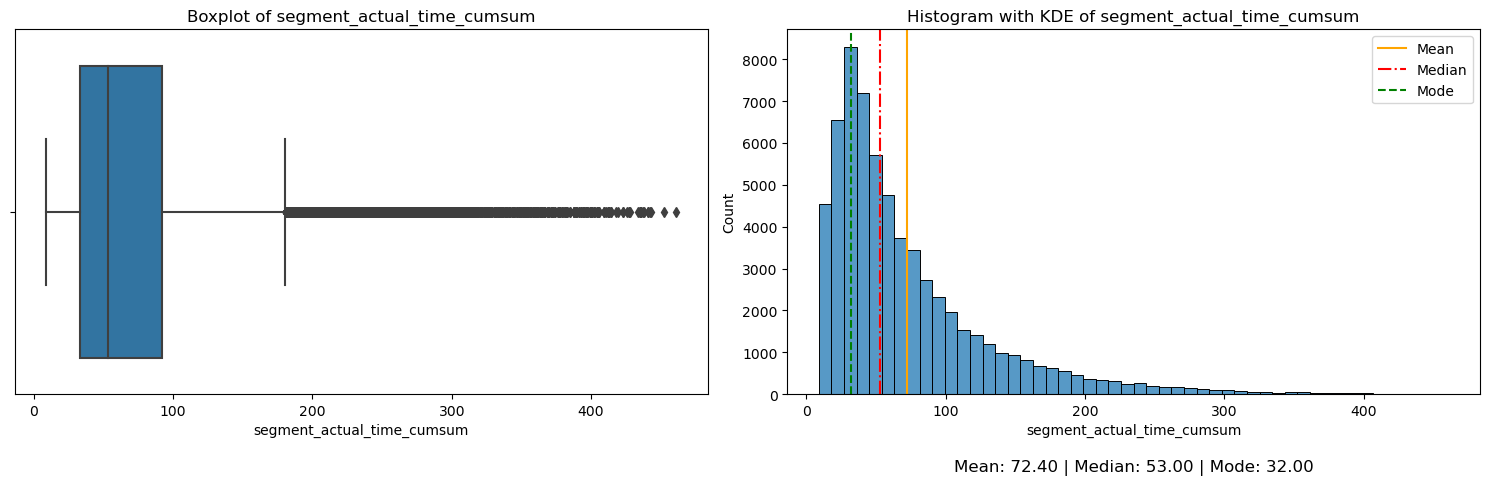

In [241]:
for col in ['actual_time', 'segment_actual_time_cumsum']:
    univariate_plot(df_iqr[col], col)

In this case, we can proceed with t-test of independence<br>
Even though the normality condition is not satisfied, the mean of data will be normally distributed due to CTL and that will do.

**Let's proceed with t-test of independence**

### T-test of independence

In [240]:
# Ho : The mean of both the data set are equal
# Ha : The mean of both the data set are not equals
# ⍺ = 0.05

res = stats.ttest_ind(df_iqr['actual_time'].sample(300), df_iqr['segment_actual_time_cumsum'].sample(300))
print(f"p-value = {res.pvalue}")

if res.pvalue < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

p-value = 0.8412972164520022
Fail to reject Ho


## `actual_distance_to_destination` vs `osrm_distance` vs `segment_osrm_distance_cumsum`

In [248]:
# Normality test
# Taking a sample of 50 as shapiro test is very sensitive to even the slightest deviation, which gets very prominent

# Ho : The data set is normally distributed
# Ha : The data set is not normally distributed
# ⍺ = 0.05

print(stats.shapiro(df_iqr['actual_distance_to_destination'].sample(50)))
print(stats.shapiro(df_iqr['osrm_distance'].sample(50)))
print(stats.shapiro(df_iqr['segment_osrm_distance_cumsum'].sample(50)))

ShapiroResult(statistic=0.8065911531448364, pvalue=1.2478899407142308e-06)
ShapiroResult(statistic=0.8201091289520264, pvalue=2.632360065035755e-06)
ShapiroResult(statistic=0.7158909440040588, pvalue=1.6141511238743078e-08)


Since p-value < ⍺<br>
We reject Null hypothesis

In [249]:
# Validate the equality of variance

# Ho : Both the data set have equal variance
# Ha : Both the date set does not have equale variance
# ⍺ = 0.05

stats.levene(df_iqr['actual_distance_to_destination'].sample(1000), 
             df_iqr['osrm_distance'].sample(1000), 
             df_iqr['segment_osrm_distance_cumsum'].sample(1000))

LeveneResult(statistic=17.326167844576723, pvalue=3.299968636730033e-08)

Since p-value < ⍺<br>
We reject Null hypothesis

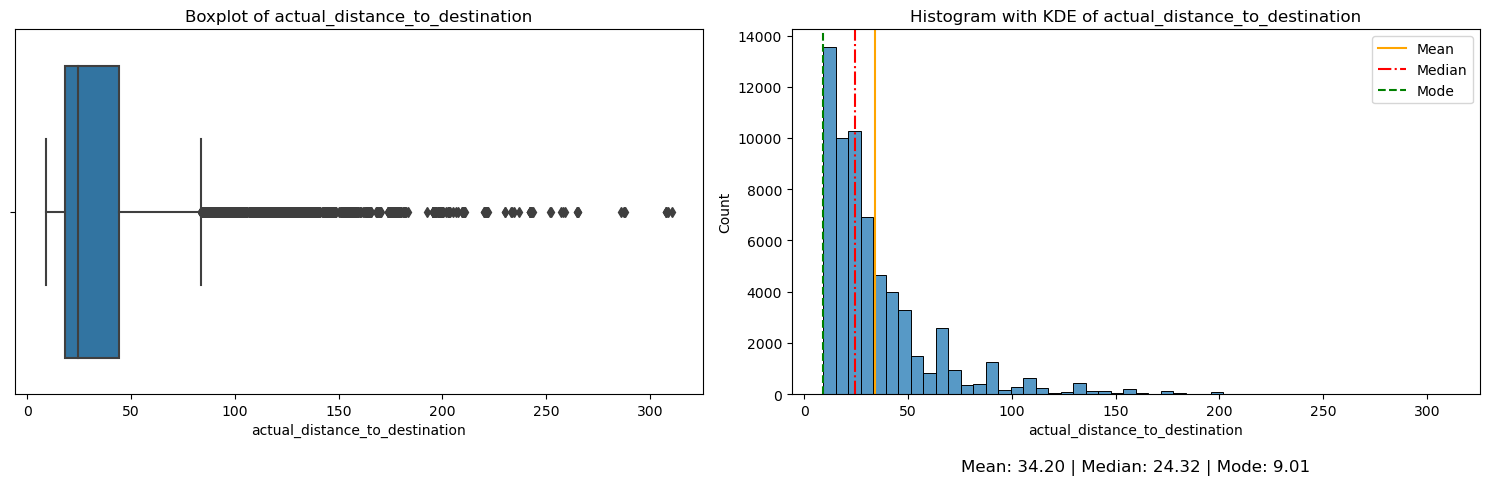

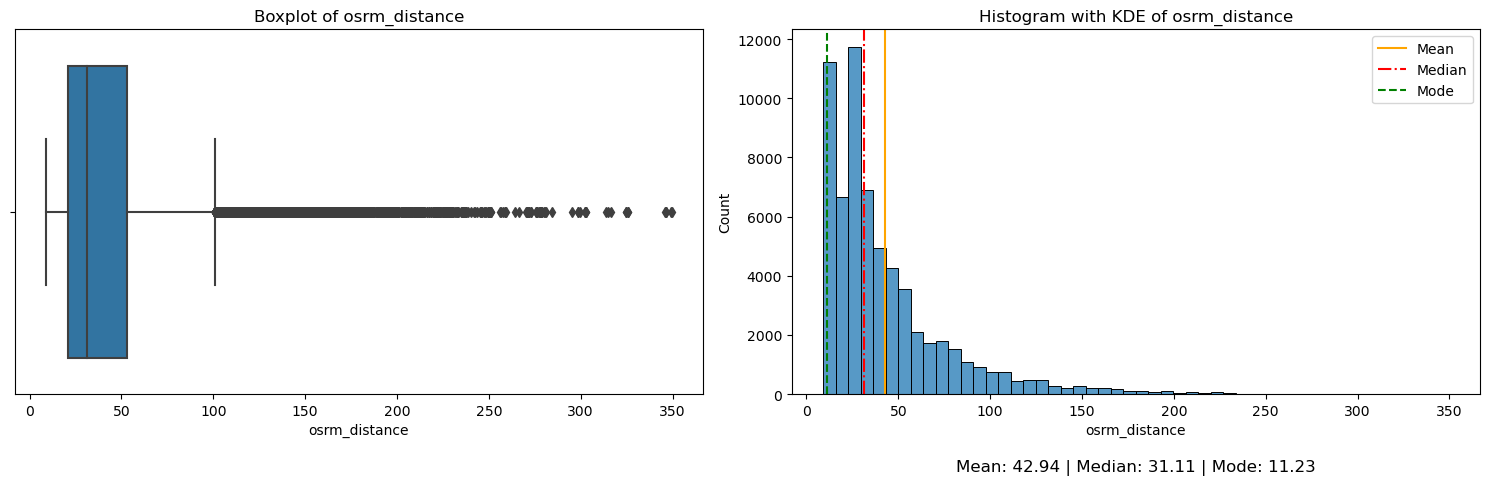

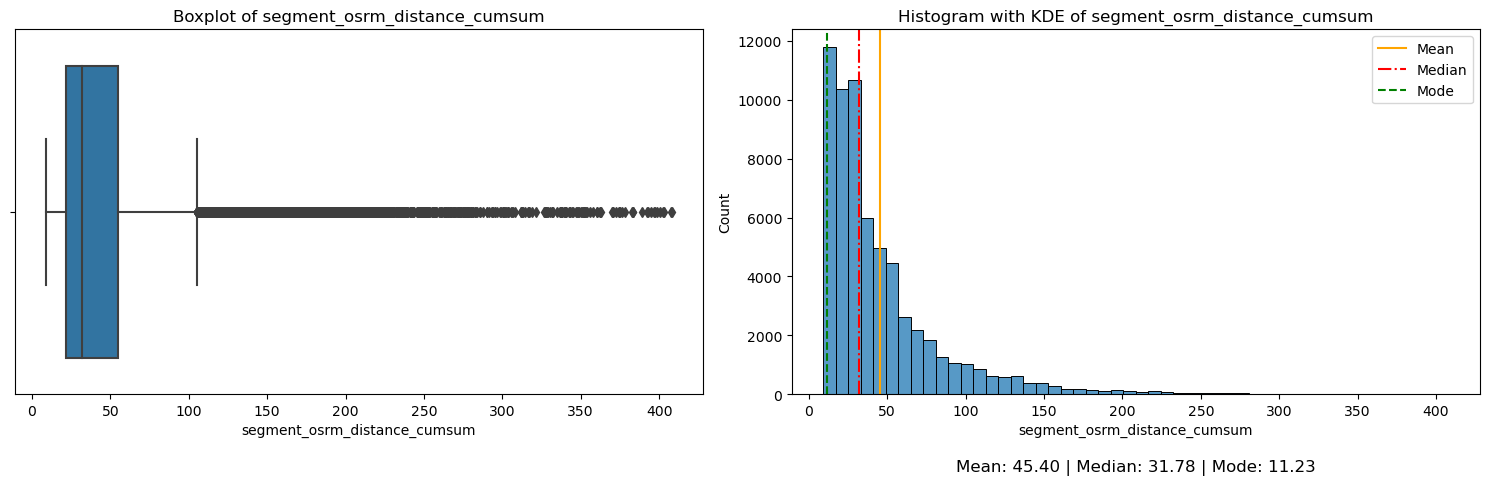

In [250]:
for col in ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance_cumsum']:
    univariate_plot(df_iqr[col], col)

Since both normality and equal variance assumptions are not correct<br>
We will do non-parametric test **Kruskal-Wallis Test**

### Kruskal-Wallis Test

In [255]:
# Ho : All 3 data sets have equal mean
# Ha : At least one of the data set mean is different from others

res = stats.kruskal(df_iqr['actual_distance_to_destination'].sample(300), 
             df_iqr['osrm_distance'].sample(300), 
             df_iqr['segment_osrm_distance_cumsum'].sample(300))
print(f"p-value = {res.pvalue}")

if res.pvalue < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

p-value = 2.3941851040480226e-09
Reject Ho


From the distribution pattern above, we can say that `actual_distance_to_destination` is the different one<br>
Thus, `osrm_distance` and `segment_osrm_distance_cumsum` seems to have same distribution and equal means

## `osrm_time` vs `segment_osrm_time_cumsum`

In [256]:
# Normality test
# Taking a sample of 50 as shapiro test is very sensitive to even the slightest deviation, which gets very prominent

# Ho : The data set is normally distributed
# Ha : The data set is not normally distributed
# ⍺ = 0.05

print(stats.shapiro(df_iqr['osrm_distance'].sample(50)))
print(stats.shapiro(df_iqr['segment_osrm_time_cumsum'].sample(50)))

ShapiroResult(statistic=0.8490955829620361, pvalue=1.46241691254545e-05)
ShapiroResult(statistic=0.6660146713256836, pvalue=2.1333055322259042e-09)


Since, p-value < ⍺<br>
We reject Null hypothesis

In [261]:
# Validate the equality of variance

# Ho : Both the data set have equal variance
# Ha : Both the date set does not have equale variance
# ⍺ = 0.05

stats.levene(df_iqr['osrm_distance'].sample(1000), 
             df_iqr['segment_osrm_time_cumsum'].sample(1000))

LeveneResult(statistic=1.5411774733520358, pvalue=0.21458834770743193)

Since p-value > ⍺<br>
We fail to reject Null hypothesis

We can perform T-test of independence

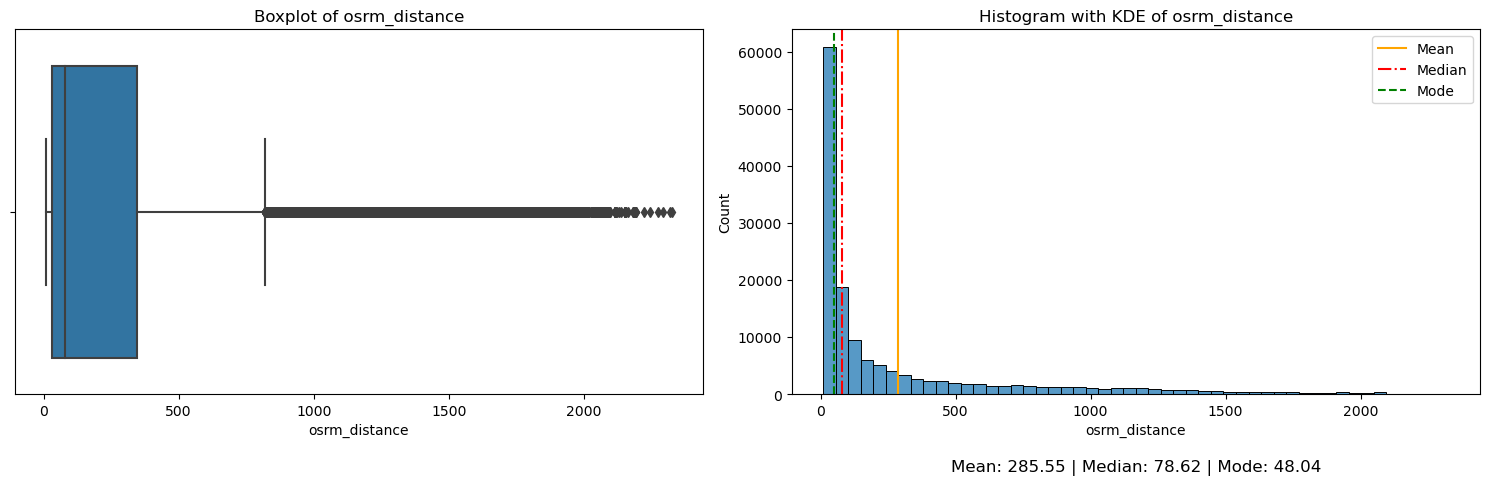

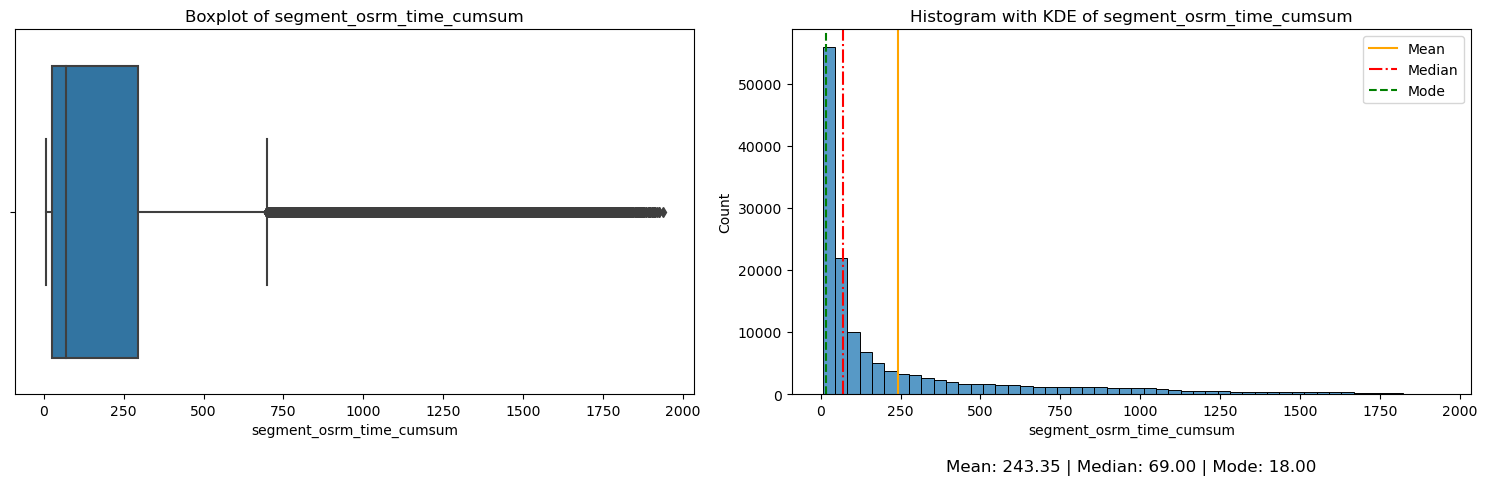

In [263]:
for col in ['osrm_distance', 'segment_osrm_time_cumsum']:
    univariate_plot(df[col], col)

### T-test of independence

In [266]:
# Ho : The mean of both the data set are equal
# Ha : The mean of both the data set are not equals
# ⍺ = 0.05

res = stats.ttest_ind(df_iqr['osrm_distance'].sample(300), 
                      df_iqr['segment_osrm_time_cumsum'].sample(300))
print(f"p-value = {res.pvalue}")

if res.pvalue < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

p-value = 0.5395122746388645
Fail to reject Ho


# Business insights & Recommendations

In [267]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63273 entries, 0 to 144866
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   data                            63273 non-null  object         
 1   trip_creation_time              63273 non-null  datetime64[ns] 
 2   route_schedule_uuid             63273 non-null  object         
 3   route_type                      63273 non-null  int64          
 4   trip_uuid                       63273 non-null  object         
 5   source_center                   63273 non-null  object         
 6   source_name                     63273 non-null  object         
 7   destination_center              63273 non-null  object         
 8   destination_name                63273 non-null  object         
 9   od_start_time                   63273 non-null  datetime64[ns] 
 10  od_end_time                     63273 non-null  datetime64[ns]

In [270]:
df_iqr['source_name_state'].value_counts().reset_index().head(10)

,source_name_state,count
0,Karnataka,9443
1,Maharashtra,8476
2,Haryana,7007
3,Tamil Nadu,6115
4,Gujarat,3575
5,Andhra Pradesh,3243
6,Uttar Pradesh,3218
7,West Bengal,3174
8,Telangana,3096
9,Rajasthan,2877


In [271]:
df_iqr['destination_name_state'].value_counts().reset_index().head(10)

,destination_name_state,count
0,Karnataka,9402
1,Maharashtra,8525
2,Haryana,6510
3,Tamil Nadu,6010
4,Andhra Pradesh,3545
5,Gujarat,3542
6,Uttar Pradesh,3445
7,Rajasthan,3181
8,West Bengal,3152
9,Telangana,2969


The top 10 states of delivery pick up and drop are same, with slight ranking deviation among them.<br>
Karnataka state seems to have the highest number of pick up and drop points.

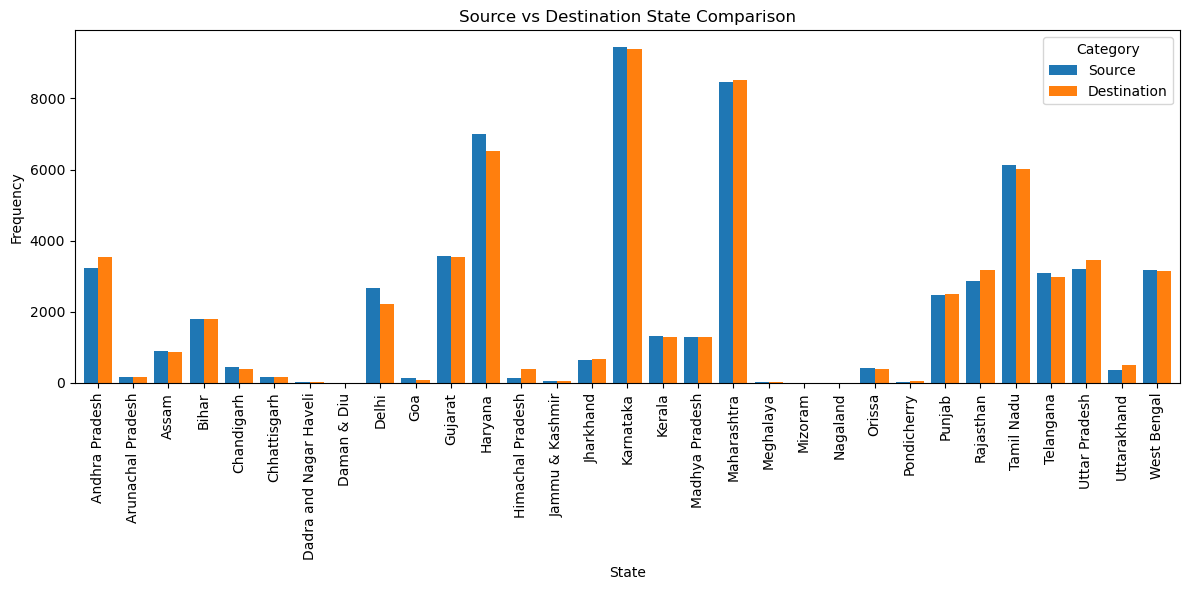

In [275]:
# Calculate value counts for both columns
source_counts = df_iqr['source_name_state'].value_counts()
destination_counts = df_iqr['destination_name_state'].value_counts()

# Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Source': source_counts,
    'Destination': destination_counts
}).fillna(0)  # Fill missing values with 0

# Plot side-by-side bar chart
comparison_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Source vs Destination State Comparison')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Visibly, every state seems to have relatively similar rank of delivery pick up and drop counts.
2. OSRM values calculated (both distance and time) are the least value that delivery takes for a particular segment.
    - The segment wise osrm time cummulative values are actually significantly same as give OSRM values (for both distance and time)
    - This means that Delhivery is already ensuring that the deliveries usually follow the most efficient route
3. The wait time before a trip start has increased over the time, especially for FTL route type
    - This could be due the fact that loading a full truck takes more time
    - Delhivery should get the data on what kind of packages do we get in FTL and carting — we can analyse if there is any dependency on the package category for the increase in waiting time.
    - Although this issue is insignificant for Carting route type, we should keep on eye on that on future deviations.
4. Cutoff factor has increased as the time has passed.
    - This means there has been in increase in delay of delivery drop time.
    - Especially in case of FTL laoding
    - Carting seems pretty stable.

---
Delhivery should specifically focus on the FTL route type trip as those trips usualy takes longer time to deliver, gets late and the no. of late deliveries is increasing with FTL, especially because FTL trips are significantly done more than the Carting trips <br>
With more data on what kind of packages are transported — we might be able to come up with some answers.